# Military Power Clustering Project
-World military power
Source : globalfirepower.com on 1st may 2020

- https://data.world/vizzup/world-military-power/workspace/file?filename=World+military+power.xlsx


# Import Libraries

In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
import pyforest
from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, RobustScaler
from sklearn.model_selection import KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge,ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report, confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import make_scorer, precision_score, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve, f1_score, accuracy_score, recall_score
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression
from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance
from sklearn.pipeline import Pipeline
from sklearn.tree import plot_tree
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

#importing plotly and cufflinks in offline mode
import cufflinks as cf
import plotly.offline
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

import warnings
warnings.filterwarnings('ignore')
warnings.warn("this will not show")
plt.rcParams["figure.figsize"] = (10,6)
pd.set_option('max_colwidth',200)

# pd.set_option('display.max_rows', 100) # if you wish to see more rows rather than default, just uncomment this line.
pd.set_option('display.max_columns', 200)
pd.set_option('display.float_format', lambda x: '%.3f' % x)

import colorama
from colorama import Fore, Style  # maakes strings colored
# !pip3 install termcolor
from termcolor import colored

# User's Defined Function

In [59]:
# Function for determining the number and percentages of missing values

def missing (df):
    missing_number = df.isnull().sum().sort_values(ascending=False)
    missing_percent = (df.isnull().sum()/df.isnull().count()).sort_values(ascending=False)
    missing_values = pd.concat([missing_number, missing_percent], axis=1, keys=['Missing_Number', 'Missing_Percent'])
    return missing_values

In [60]:
# To view summary information about the column

def first_looking(col):
    print("column name    : ", col)
    print("--------------------------------")
    print("per_of_nulls   : ", "%", round(df[col].isnull().sum()/df.shape[0]*100, 2))
    print("num_of_nulls   : ", df[col].isnull().sum())
    print("num_of_uniques : ", df[col].nunique())
    print(df[col].value_counts(dropna = False))

In [61]:
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"R2" : r2_score(y_train, y_train_pred),
    "mae" : mean_absolute_error(y_train, y_train_pred),
    "mse" : mean_squared_error(y_train, y_train_pred),                          
    "rmse" : np.sqrt(mean_squared_error(y_train, y_train_pred))},
    
    "test_set": {"R2" : r2_score(y_test, y_pred),
    "mae" : mean_absolute_error(y_test, y_pred),
    "mse" : mean_squared_error(y_test, y_pred),
    "rmse" : np.sqrt(mean_squared_error(y_test, y_pred))}}
    
    return pd.DataFrame(scores)

In [62]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

# Ingest Data  

In [63]:
df0 = pd.read_excel("World military power.xlsx", header=1)
df = df0.copy()

In [64]:
df0.head(1)

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                          1.344       Afghanistan   

   Aircraft Strength value Fighter/Interceptor Strength  \
0                      260                  Afghanistan   

   Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0              Afghanistan   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25                       Afghanistan   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                       30            Afghanistan   

   Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                             0               Afghanistan   

   Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                              187                      Afghanistan   

   Attack Helicopter Fleet Strength value Tank Strength  Tank Strength value  \
0                                       0   Afghanistan                    0   

  AFV/APC Strength  AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                    1062                       Afghanistan   

   Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                        0              Afghanistan   

   Towed Artillery Strength value Rocket Projector Strength  \
0                             176               Afghanistan   

   Rocket Projector Strength value Navy Fleet Strengths  \
0                               50          Afghanistan   

   Navy Fleet Strengths value Aircraft Carrier Fleet Strength  \
0                       0.000                     Afghanistan   

   Aircraft Carrier Fleet Strength value Submarine Fleet Strength  \
0                                  0.000              Afghanistan   

   Submarine Fleet Strength value Destroyer Fleet Strength  \
0                           0.000              Afghanistan   

   Destroyer Fleet Strength value Frigate Fleet Strength  \
0                           0.000            Afghanistan   

   Frigate Fleet Strength value defense spending budget  \
0                         0.000             Afghanistan   

  defense spending budget value External Debt External Debt value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  Airport Totals  Airport Totals value Oil Production Oil Production value  \
0    Afghanistan                    43    Afghanistan                    0   

  Oil Consumption Oil Consumption value Proven Oil Reserves  \
0     Afghanistan                  5500         Afghanistan   

  Proven Oil Reserves value Available Manpower Available Manpower value  \
0                         0        Afghanistan              1,43,25,743   

  Total Population Total Population value Total Square Land Area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  Total Square Land Area value Total Coastline Coverage  \
0                     6,52,230              Afghanistan   

  Total Coastline Coverage value Total Waterway Coverage  \
0                              0             Afghanistan   

  Total Waterway Coverage value Total Border Coverage  \
0                          1200           Afghanistan   

   Total Border Coverage value  
0                     5987.000

# EDA

## Implement basic steps to see how is your data looks like

In [65]:
df.head(3)

Military Strength  Military Strength Power Index Aircraft Strength  \
0       Afghanistan                          1.344       Afghanistan   
1           Albania                          2.314           Albania   
2           Algeria                          0.466           Algeria   

   Aircraft Strength value Fighter/Interceptor Strength  \
0                      260                  Afghanistan   
1                       19                      Albania   
2                      551                      Algeria   

   Fighter/Interceptor Strength value Attack Aircraft Strength  \
0                                   0              Afghanistan   
1                                   0                  Albania   
2                                 103                  Algeria   

   Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
0                              25                       Afghanistan   
1                               0                           Albania   
2                              22                           Algeria   

   Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
0                                       30            Afghanistan   
1                                        0                Albania   
2                                       59                Algeria   

   Trainer Aircraft Fleet value Helicopter Fleet Strength  \
0                             0               Afghanistan   
1                             0                   Albania   
2                            87                   Algeria   

   Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
0                              187                      Afghanistan   
1                               19                          Albania   
2                              257                          Algeria   

   Attack Helicopter Fleet Strength value Tank Strength  Tank Strength value  \
0                                       0   Afghanistan                    0   
1                                       0       Albania                    0   
2                                      45       Algeria                  880   

  AFV/APC Strength  AFV/APC Strength value Self-Propelled Artillery Strength  \
0      Afghanistan                    1062                       Afghanistan   
1          Albania                     467                           Albania   
2          Algeria                    7361                           Algeria   

   Self-Propelled Artillery Strength value Towed Artillery Strength  \
0                                        0              Afghanistan   
1                                        0                  Albania   
2                                      320                  Algeria   

   Towed Artillery Strength value Rocket Projector Strength  \
0                             176               Afghanistan   
1                               0                   Albania   
2                             240                   Algeria   

   Rocket Projector Strength value Navy Fleet Strengths  \
0                               50          Afghanistan   
1                                0              Albania   
2                              316              Algeria   

   Navy Fleet Strengths value Aircraft Carrier Fleet Strength  \
0                       0.000                     Afghanistan   
1                      38.000                         Albania   
2                     201.000                         Algeria   

   Aircraft Carrier Fleet Strength value Submarine Fleet Strength  \
0                                  0.000              Afghanistan   
1                                  0.000                  Albania   
2                                  0.000                  Algeria   

   Submarine Fleet Strength value Destroyer Fleet Strength  \
0                           0.000              Afghanistan   
1                           0.000       

In [66]:
df.tail(3)

Military Strength  Military Strength Power Index Aircraft Strength  \
135             Yemen                          1.241             Yemen   
136            Zambia                          1.646            Zambia   
137          Zimbabwe                          1.758          Zimbabwe   

     Aircraft Strength value Fighter/Interceptor Strength  \
135                      169                        Yemen   
136                      108                       Zambia   
137                       90                     Zimbabwe   

     Fighter/Interceptor Strength value Attack Aircraft Strength  \
135                                  77                    Yemen   
136                                  18                   Zambia   
137                                  10                 Zimbabwe   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
135                               0                             Yemen   
136                               0                            Zambia   
137                               0                          Zimbabwe   

     Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
135                                        8                  Yemen   
136                                       11                 Zambia   
137                                       14               Zimbabwe   

     Trainer Aircraft Fleet value Helicopter Fleet Strength  \
135                            21                     Yemen   
136                            52                    Zambia   
137                            38                  Zimbabwe   

     Helicopter Fleet Strength value Attack Helicopter Fleet Strength  \
135                               61                            Yemen   
136                               27                           Zambia   
137                               28                         Zimbabwe   

     Attack Helicopter Fleet Strength value Tank Strength  \
135                                      14         Yemen   
136                                       0        Zambia   
137                                       6      Zimbabwe   

     Tank Strength value AFV/APC Strength  AFV/APC Strength value  \
135                  620            Yemen                     615   
136                   75           Zambia                     184   
137                   42         Zimbabwe                     300   

    Self-Propelled Artillery Strength  \
135                             Yemen   
136                            Zambia   
137                          Zimbabwe   

     Self-Propelled Artillery Strength value Towed Artillery Strength  \
135                                       20                    Yemen   
136                                        0                   Zambia   
137                                        0                 Zimbabwe   

     Towed Artillery Strength value Rocket Projector Strength  \
135                              85                     Yemen   
136                              42                    Zambia   
137                              65                  Zimbabwe   

     Rocket Projector Strength value Navy Fleet Strengths  \
135                              150                Yemen   
136                               50               Zambia   
137                               22             Zimbabwe   

     Navy Fleet Strengths value Aircraft Carrier Fleet Strength  \
135                      30.000                           Yemen   
136                       0.000                          Zambia   
137                       0.000                        Zimbabwe   

     Aircraft Carrier Fleet Strength value Submarine Fleet Strength  \
135                                  0.000                    Yemen   
136                                  0.000                   Zambia   
137                                  0.000                 Zimbabwe   

     Submarine Fleet Stre

In [67]:
df.sample(10)

Military Strength  Military Strength Power Index Aircraft Strength  \
64             Latvia                          2.014            Latvia   
115          Suriname                          4.604          Suriname   
42            Georgia                          1.668           Georgia   
78         Mozambique                          2.336        Mozambique   
76         Montenegro                          2.994        Montenegro   
25              Chile                          0.767             Chile   
51               Iran                          0.219              Iran   
114             Sudan                          1.302             Sudan   
84          Nicaragua                          2.275         Nicaragua   
60              Kenya                          1.529             Kenya   

     Aircraft Strength value Fighter/Interceptor Strength  \
64                         5                       Latvia   
115                        3                     Suriname   
42                        66                      Georgia   
78                        16                   Mozambique   
76                         9                   Montenegro   
25                       282                        Chile   
51                       509                         Iran   
114                      190                        Sudan   
84                        19                    Nicaragua   
60                       150                        Kenya   

     Fighter/Interceptor Strength value Attack Aircraft Strength  \
64                                    0                   Latvia   
115                                   0                 Suriname   
42                                    0                  Georgia   
78                                    8               Mozambique   
76                                    0               Montenegro   
25                                   44                    Chile   
51                                  155                     Iran   
114                                  46                    Sudan   
84                                    0                Nicaragua   
60                                   17                    Kenya   

     Attack Aircraft Strength value Transport Aircraft Fleet Strength  \
64                                0                            Latvia   
115                               0                          Suriname   
42                               10                           Georgia   
78                                0                        Mozambique   
76                                0                        Montenegro   
25                                0                             Chile   
51                               23                              Iran   
114                              38                             Sudan   
84                                0                         Nicaragua   
60                                0                             Kenya   

     Transport Aircraft Fleet Strength value Trainer Aircraft Fleet  \
64                                         0                 Latvia   
115                                        0               Suriname   
42                                         2                Georgia   
78                                         1             Mozambique   
76                                         0             Montenegro   
25                                        30                  Chile   
51                                        62                   Iran   
114                                       22                  Sudan   
84                                         5              Nicaragua   
60                                        20                  Kenya   

     Trainer Aircraft Fleet value Helicopter Fleet Strength  \
64                             12                    Latvia   
115                             0                  Surin

In [68]:
df.columns

Index(['Military Strength', 'Military Strength Power Index',
       'Aircraft Strength', 'Aircraft Strength value',
       'Fighter/Interceptor Strength', 'Fighter/Interceptor Strength value',
       'Attack Aircraft Strength', 'Attack Aircraft Strength value',
       'Transport Aircraft Fleet Strength',
       'Transport Aircraft Fleet Strength value', 'Trainer Aircraft Fleet',
       'Trainer Aircraft Fleet value', 'Helicopter Fleet Strength',
       'Helicopter Fleet Strength value', 'Attack Helicopter Fleet Strength',
       'Attack Helicopter Fleet Strength value', 'Tank Strength',
       'Tank Strength value', 'AFV/APC Strength', 'AFV/APC Strength value',
       'Self-Propelled Artillery Strength',
       'Self-Propelled Artillery Strength value', 'Towed Artillery Strength',
       'Towed Artillery Strength value', 'Rocket Projector Strength',
       'Rocket Projector Strength value', 'Navy Fleet Strengths',
       'Navy Fleet Strengths value', 'Aircraft Carrier Fleet Strength',


In [69]:
df.columns = df.columns.str.lower().str.replace('&', '_').str.replace(' ', '_')

In [70]:
df.columns

Index(['military_strength', 'military_strength_power_index',
       'aircraft_strength', 'aircraft_strength_value',
       'fighter/interceptor_strength', 'fighter/interceptor_strength_value',
       'attack_aircraft_strength', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',


In [71]:
df.shape

(138, 60)

In [72]:
print("There is", df.shape[0], "observation and", df.shape[1], "columns in the dataset")

There is 138 observation and 60 columns in the dataset


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138 entries, 0 to 137
Data columns (total 60 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   military_strength                        138 non-null    object 
 1   military_strength_power_index            138 non-null    float64
 2   aircraft_strength                        138 non-null    object 
 3   aircraft_strength_value                  138 non-null    int64  
 4   fighter/interceptor_strength             138 non-null    object 
 5   fighter/interceptor_strength_value       138 non-null    int64  
 6   attack_aircraft_strength                 138 non-null    object 
 7   attack_aircraft_strength_value           138 non-null    int64  
 8   transport_aircraft_fleet_strength        138 non-null    object 
 9   transport_aircraft_fleet_strength_value  138 non-null    int64  
 10  trainer_aircraft_fleet                   138 non-n

In [74]:
df.describe().T

count     mean      std    min  \
military_strength_power_index           138.000    1.461    1.324  0.061   
aircraft_strength_value                 138.000  388.471 1231.982  0.000   
fighter/interceptor_strength_value      138.000   81.565  230.325  0.000   
attack_aircraft_strength_value          138.000   25.761   94.528  0.000   
transport_aircraft_fleet_strength_value 138.000   30.232   92.330  0.000   
trainer_aircraft_fleet_value            138.000   82.833  240.804  0.000   
helicopter_fleet_strength_value         138.000  154.065  520.184  0.000   
attack_helicopter_fleet_strength_value  138.000   25.623   97.326  0.000   
tank_strength_value                     138.000  646.565 1515.464  0.000   
afv/apc_strength_value                  138.000 2485.696 5410.546  0.000   
self-propelled_artillery_strength_value 138.000  212.159  688.029  0.000   
towed_artillery_strength_value          138.000  393.978  805.782  0.000   
rocket_projector_strength_value         138.000  156.935  484.381  0.000   
navy_fleet_strengths_value              124.000   84.984  146.114  0.000   
aircraft_carrier_fleet_strength_value   115.000    0.383    1.972  0.000   
submarine_fleet_strength_value          115.000    4.800   13.707  0.000   
destroyer_fleet_strength_value          115.000    2.052   10.001  0.000   
frigate_fleet_strength_value            115.000    3.522    6.481  0.000   
airport_totals_value                    138.000  290.043 1212.967  2.000   
total_border_coverage_value             129.000 3964.225 3760.100 29.000   

                                             25%      50%      75%       max  
military_strength_power_index              0.575    1.034    2.022    10.168  
aircraft_strength_value                   33.000  111.000  290.250 13264.000  
fighter/interceptor_strength_value         0.000   17.000   60.500  2085.000  
attack_aircraft_strength_value             0.000    0.000   15.750   742.000  
transport_aircraft_fleet_strength_value    3.000    9.000   26.000   945.000  
trainer_aircraft_fleet_value               4.250   26.000   79.250  2643.000  
helicopter_fleet_strength_value           15.250   44.000  126.750  5768.000  
attack_helicopter_fleet_strength_value     0.000    2.000   17.750   967.000  
tank_strength_value                       19.250  153.000  436.250 12950.000  
afv/apc_strength_value                   250.250  734.500 2000.000 39253.000  
self-propelled_artillery_strength_value    0.000   23.000   97.250  6083.000  
towed_artillery_strength_value            24.250  108.000  296.500  4465.000  
rocket_projector_strength_value            0.000   24.000   99.750  3860.000  
navy_fleet_strengths_value                10.000   38.000   77.750   984.000  
aircraft_carrier_fleet_strength_value      0.000    0.000    0.000    20.000  
submarine_fleet_strength_value             0.000    0.000    4.000    83.000  
destroyer_fleet_strength_value             0.000    0.000    0.000    91.000  
frigate_fleet_strength_value               0.000    0.000    5.500    52.000  
airport_totals_value                      33.500   68.000  150.750 13513.000  
total_border_coverage_value             1587.000 2816.000 5267.000 22457.000

In [75]:
df.describe(include=object).T

count unique              top freq
military_strength                   138    138         Suriname    1
aircraft_strength                   138    138         Suriname    1
fighter/interceptor_strength        138    138         Suriname    1
attack_aircraft_strength            138    138         Suriname    1
transport_aircraft_fleet_strength   138    138         Suriname    1
trainer_aircraft_fleet              138    138         Suriname    1
helicopter_fleet_strength           138    138         Suriname    1
attack_helicopter_fleet_strength    138    138         Suriname    1
tank_strength                       138    138         Suriname    1
afv/apc_strength                    138    138         Suriname    1
self-propelled_artillery_strength   138    138         Suriname    1
towed_artillery_strength            138    138         Suriname    1
rocket_projector_strength           138    138         Suriname    1
navy_fleet_strengths                124    124         Suriname    1
aircraft_carrier_fleet_strength     115    115         Suriname    1
submarine_fleet_strength            115    115         Suriname    1
destroyer_fleet_strength            115    115         Suriname    1
frigate_fleet_strength              115    115         Suriname    1
defense_spending_budget             138    138         Suriname    1
defense_spending_budget_value       138    124   2,50,00,00,000    3
external_debt                       138    138         Suriname    1
external_debt_value                 138    138  76,18,00,00,000    1
airport_totals                      138    138         Suriname    1
oil_production                      138    138         Suriname    1
oil_production_value                138     88                0   46
oil_consumption                     138    138         Suriname    1
oil_consumption_value               138    102            18500    4
proven_oil_reserves                 138    138         Suriname    1
proven_oil_reserves_value           138     84                0   46
available_manpower                  138    138         Suriname    1
available_manpower_value            138    138        46,29,744    1
total_population                    138    138         Suriname    1
total_population_value              138    138        21,02,126    1
total_square_land_area              138    138         Suriname    1
total_square_land_area_value        138    138        98,26,675    1
total_coastline_coverage            109    109         Suriname    1
total_coastline_coverage_value      109    104              853    2
total_waterway_coverage             138    138         Suriname    1
total_waterway_coverage_value       138     92                0   38
total_border_coverage               129    129         Suriname    1

In [76]:
df.nunique()

military_strength                          138
military_strength_power_index              138
aircraft_strength                          138
aircraft_strength_value                    113
fighter/interceptor_strength               138
fighter/interceptor_strength_value          63
attack_aircraft_strength                   138
attack_aircraft_strength_value              38
transport_aircraft_fleet_strength          138
transport_aircraft_fleet_strength_value     49
trainer_aircraft_fleet                     138
trainer_aircraft_fleet_value                77
helicopter_fleet_strength                  138
helicopter_fleet_strength_value             97
attack_helicopter_fleet_strength           138
attack_helicopter_fleet_strength_value      45
tank_strength                              138
tank_strength_value                        106
afv/apc_strength                           138
afv/apc_strength_value                     130
self-propelled_artillery_strength          138
self-propelle

In [77]:
# to find how many unique values object features have
for col in df.select_dtypes(include=[np.number]).columns:
  print(f"{col} has {df[col].nunique()} unique value")

military_strength_power_index has 138 unique value
aircraft_strength_value has 113 unique value
fighter/interceptor_strength_value has 63 unique value
attack_aircraft_strength_value has 38 unique value
transport_aircraft_fleet_strength_value has 49 unique value
trainer_aircraft_fleet_value has 77 unique value
helicopter_fleet_strength_value has 97 unique value
attack_helicopter_fleet_strength_value has 45 unique value
tank_strength_value has 106 unique value
afv/apc_strength_value has 130 unique value
self-propelled_artillery_strength_value has 70 unique value
towed_artillery_strength_value has 91 unique value
rocket_projector_strength_value has 68 unique value
navy_fleet_strengths_value has 78 unique value
aircraft_carrier_fleet_strength_value has 5 unique value
submarine_fleet_strength_value has 20 unique value
destroyer_fleet_strength_value has 11 unique value
frigate_fleet_strength_value has 18 unique value
airport_totals_value has 108 unique value
total_border_coverage_value has 1

In [78]:
df.duplicated().value_counts()

False    138
dtype: int64

## Convert multi index columns to one level

In [79]:
df.head(1)

military_strength  military_strength_power_index aircraft_strength  \
0       Afghanistan                          1.344       Afghanistan   

   aircraft_strength_value fighter/interceptor_strength  \
0                      260                  Afghanistan   

   fighter/interceptor_strength_value attack_aircraft_strength  \
0                                   0              Afghanistan   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   

   trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                             0               Afghanistan   

   helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                              187                      Afghanistan   

   attack_helicopter_fleet_strength_value tank_strength  tank_strength_value  \
0                                       0   Afghanistan                    0   

  afv/apc_strength  afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                    1062                       Afghanistan   

   self-propelled_artillery_strength_value towed_artillery_strength  \
0                                        0              Afghanistan   

   towed_artillery_strength_value rocket_projector_strength  \
0                             176               Afghanistan   

   rocket_projector_strength_value navy_fleet_strengths  \
0                               50          Afghanistan   

   navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                       0.000                     Afghanistan   

   aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
0                                  0.000              Afghanistan   

   submarine_fleet_strength_value destroyer_fleet_strength  \
0                           0.000              Afghanistan   

   destroyer_fleet_strength_value frigate_fleet_strength  \
0                           0.000            Afghanistan   

   frigate_fleet_strength_value defense_spending_budget  \
0                         0.000             Afghanistan   

  defense_spending_budget_value external_debt external_debt_value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  airport_totals  airport_totals_value oil_production oil_production_value  \
0    Afghanistan                    43    Afghanistan                    0   

  oil_consumption oil_consumption_value proven_oil_reserves  \
0     Afghanistan                  5500         Afghanistan   

  proven_oil_reserves_value available_manpower available_manpower_value  \
0                         0        Afghanistan              1,43,25,743   

  total_population total_population_value total_square_land_area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   

  total_coastline_coverage_value total_waterway_coverage  \
0                              0             Afghanistan   

  total_waterway_coverage_value total_border_coverage  \
0                          1200           Afghanistan   

   total_border_coverage_value  
0                     5987.000

In [80]:
df.rename(columns={'military_strength': 'country'}, inplace=True)

In [81]:
df.head(1)

country  military_strength_power_index aircraft_strength  \
0  Afghanistan                          1.344       Afghanistan   

   aircraft_strength_value fighter/interceptor_strength  \
0                      260                  Afghanistan   

   fighter/interceptor_strength_value attack_aircraft_strength  \
0                                   0              Afghanistan   

   attack_aircraft_strength_value transport_aircraft_fleet_strength  \
0                              25                       Afghanistan   

   transport_aircraft_fleet_strength_value trainer_aircraft_fleet  \
0                                       30            Afghanistan   

   trainer_aircraft_fleet_value helicopter_fleet_strength  \
0                             0               Afghanistan   

   helicopter_fleet_strength_value attack_helicopter_fleet_strength  \
0                              187                      Afghanistan   

   attack_helicopter_fleet_strength_value tank_strength  tank_strength_value  \
0                                       0   Afghanistan                    0   

  afv/apc_strength  afv/apc_strength_value self-propelled_artillery_strength  \
0      Afghanistan                    1062                       Afghanistan   

   self-propelled_artillery_strength_value towed_artillery_strength  \
0                                        0              Afghanistan   

   towed_artillery_strength_value rocket_projector_strength  \
0                             176               Afghanistan   

   rocket_projector_strength_value navy_fleet_strengths  \
0                               50          Afghanistan   

   navy_fleet_strengths_value aircraft_carrier_fleet_strength  \
0                       0.000                     Afghanistan   

   aircraft_carrier_fleet_strength_value submarine_fleet_strength  \
0                                  0.000              Afghanistan   

   submarine_fleet_strength_value destroyer_fleet_strength  \
0                           0.000              Afghanistan   

   destroyer_fleet_strength_value frigate_fleet_strength  \
0                           0.000            Afghanistan   

   frigate_fleet_strength_value defense_spending_budget  \
0                         0.000             Afghanistan   

  defense_spending_budget_value external_debt external_debt_value  \
0               12,00,00,00,000   Afghanistan      2,84,00,00,000   

  airport_totals  airport_totals_value oil_production oil_production_value  \
0    Afghanistan                    43    Afghanistan                    0   

  oil_consumption oil_consumption_value proven_oil_reserves  \
0     Afghanistan                  5500         Afghanistan   

  proven_oil_reserves_value available_manpower available_manpower_value  \
0                         0        Afghanistan              1,43,25,743   

  total_population total_population_value total_square_land_area  \
0      Afghanistan            3,49,40,837            Afghanistan   

  total_square_land_area_value total_coastline_coverage  \
0                     6,52,230              Afghanistan   

  total_coastline_coverage_value total_waterway_coverage  \
0                              0             Afghanistan   

  total_waterway_coverage_value total_border_coverage  \
0                          1200           Afghanistan   

   total_border_coverage_value  
0                     5987.000

In [ ]:
# drop_columns = []
# for i in range(2, df.shape[1], 2):
#     drop_columns.append(df.columns[i])
# df.drop(drop_columns, axis= 1, inplace= True)


In [ ]:
df = df.T.drop_duplicates().T


In [82]:
#df = df.reset_index()
#del df['index']

In [83]:
#df.head(1)

In [84]:
#df.set_index('country', inplace=True)

In [85]:
#df.head(1)

## Detect and drop duplicated columns

In [86]:
df.columns

Index(['country', 'military_strength_power_index', 'aircraft_strength',
       'aircraft_strength_value', 'fighter/interceptor_strength',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength',
       'attack_aircraft_strength_value', 'transport_aircraft_fleet_strength',
       'transport_aircraft_fleet_strength_value', 'trainer_aircraft_fleet',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength',
       'helicopter_fleet_strength_value', 'attack_helicopter_fleet_strength',
       'attack_helicopter_fleet_strength_value', 'tank_strength',
       'tank_strength_value', 'afv/apc_strength', 'afv/apc_strength_value',
       'self-propelled_artillery_strength',
       'self-propelled_artillery_strength_value', 'towed_artillery_strength',
       'towed_artillery_strength_value', 'rocket_projector_strength',
       'rocket_projector_strength_value', 'navy_fleet_strengths',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength',
       'aircraft_

In [87]:
drop_columns = ['aircraft_strength',
               'fighter/interceptor_strength',
               'attack_aircraft_strength',
               'transport_aircraft_fleet_strength',
               'trainer_aircraft_fleet',
               'helicopter_fleet_strength',
               'attack_helicopter_fleet_strength',
               'tank_strength',
               'afv/apc_strength',
               'self-propelled_artillery_strength',
               'towed_artillery_strength',
               'rocket_projector_strength',
               'navy_fleet_strengths',
               'aircraft_carrier_fleet_strength',
               'submarine_fleet_strength',
               'destroyer_fleet_strength',
               'frigate_fleet_strength',
               'defense_spending_budget',
               'external_debt',
               'airport_totals', 
               'oil_production',
               'oil_consumption',
               'proven_oil_reserves',
               'available_manpower',
               'total_population',
               'total_square_land_area',
               'total_coastline_coverage',
               'total_waterway_coverage',
               'total_border_coverage',
               ]

In [88]:
df.drop(drop_columns, axis = 1, inplace = True)

In [89]:
df.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

  defense_spending_budget_value external_debt_value  airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                    43   

  oil_production_value oil_consumption_value proven_oil_reserves_value  \
0                    0                  5500                         0   

  available_manpower_value total_population_value  \
0              1,43,25,743            3,49,40,837   

  total_square_land_area_value total_coastline_coverage_value  \
0                     6,52,230                              0   

  total_waterway_coverage_value  total_border_coverage_value  
0                          1200                     5987.000

In [90]:
df.shape

(138, 31)

## Check for missing values 

In [91]:
missing (df)

Missing_Number  Missing_Percent
total_coastline_coverage_value                       29            0.210
aircraft_carrier_fleet_strength_value                23            0.167
frigate_fleet_strength_value                         23            0.167
destroyer_fleet_strength_value                       23            0.167
submarine_fleet_strength_value                       23            0.167
navy_fleet_strengths_value                           14            0.101
total_border_coverage_value                           9            0.065
helicopter_fleet_strength_value                       0            0.000
attack_helicopter_fleet_strength_value                0            0.000
total_waterway_coverage_value                         0            0.000
aircraft_strength_value                               0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
fighter/interceptor_strength_value                    0            0.000
attack_aircraft_strength_value                        0            0.000
transport_aircraft_fleet_strength_value               0            0.000
military_strength_power_index                         0            0.000
trainer_aircraft_fleet_value                          0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
country                                               0            0.000

## Deal with missing values 
* Hint-1, use wikipedia to fill in missing values ​​comparing with similar countries
* Hint-2, Georeferences of countries can help you

In [92]:
# submarine_fleet_strength_value : South Korea --> 22
# frigate_fleet_strength_value : South Korea --> 4
# destroyer_fleet_strength_value : South Korea --> 12

In [93]:
df.loc[(df['country']=="South Kores") & (df['submarine_fleet_strength_value'].isnull()), 'submarine_fleet_strength_value'] = 22

In [94]:
df.loc[(df['country']=="South Kores") & (df['frigate_fleet_strength_value'].isnull()), 'frigate_fleet_strength_value'] = 4

In [95]:
df.loc[(df['country']=="South Kores") & (df['destroyer_fleet_strength_value'].isnull()), 'destroyer_fleet_strength_value'] = 12

In [96]:
df.fillna(0, inplace=True)

In [97]:
missing (df)

Missing_Number  Missing_Percent
country                                               0            0.000
submarine_fleet_strength_value                        0            0.000
total_waterway_coverage_value                         0            0.000
total_coastline_coverage_value                        0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
frigate_fleet_strength_value                          0            0.000
destroyer_fleet_strength_value                        0            0.000
aircraft_carrier_fleet_strength_value                 0            0.000
military_strength_power_index                         0            0.000
navy_fleet_strengths_value                            0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
attack_helicopter_fleet_strength_value                0            0.000
helicopter_fleet_strength_value                       0            0.000
trainer_aircraft_fleet_value                          0            0.000
transport_aircraft_fleet_strength_value               0            0.000
attack_aircraft_strength_value                        0            0.000
fighter/interceptor_strength_value                    0            0.000
aircraft_strength_value                               0            0.000
total_border_coverage_value                           0            0.000

In [99]:
df = df.reset_index(drop=True)


In [100]:
df.head(1)

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   

  defense_spending_budget_value external_debt_value  airport_totals_value  \
0               12,00,00,00,000      2,84,00,00,000                    43   

  oil_production_value oil_consumption_value proven_oil_reserves_value  \
0                    0                  5500                         0   

  available_manpower_value total_population_value  \
0              1,43,25,743            3,49,40,837   

  total_square_land_area_value total_coastline_coverage_value  \
0                     6,52,230                              0   

  total_waterway_coverage_value  total_border_coverage_value  
0                          1200                     5987.000

In [102]:
df.set_index('country', inplace=True)

In [103]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value defense_spending_budget_value  \
country                                                                   
Afghanistan                         0.000               12,00,00,00,000   

            external_debt_value  airport_totals_value oil_production_value  \
country                                                                      
Afghanistan      2,84,00,00,000                    43                    0   

            oil_consumption_value proven_oil_reserves_value  \
country                                                       
Afghanistan                  5500                         0   

            available_manpower_value total_population_value  \
country                                                       
Afghanistan              1,43,25,743            3,49,40,837   

            total_square_land_area_value total_coastline_coverage_value  \
country                                                                   
Afghanistan                     6,52,230                              0   

            total_waterway_coverage_value  total_border_coverage_value  
country                                                                 
Afghanistan                          1200                     5987.000

In [104]:
df.shape

(138, 30)

## Fix the dtypes

In [105]:
df.dtypes

military_strength_power_index              float64
aircraft_strength_value                      int64
fighter/interceptor_strength_value           int64
attack_aircraft_strength_value               int64
transport_aircraft_fleet_strength_value      int64
trainer_aircraft_fleet_value                 int64
helicopter_fleet_strength_value              int64
attack_helicopter_fleet_strength_value       int64
tank_strength_value                          int64
afv/apc_strength_value                       int64
self-propelled_artillery_strength_value      int64
towed_artillery_strength_value               int64
rocket_projector_strength_value              int64
navy_fleet_strengths_value                 float64
aircraft_carrier_fleet_strength_value      float64
submarine_fleet_strength_value             float64
destroyer_fleet_strength_value             float64
frigate_fleet_strength_value               float64
defense_spending_budget_value               object
external_debt_value            

In [106]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value defense_spending_budget_value  \
country                                                                   
Afghanistan                         0.000               12,00,00,00,000   

            external_debt_value  airport_totals_value oil_production_value  \
country                                                                      
Afghanistan      2,84,00,00,000                    43                    0   

            oil_consumption_value proven_oil_reserves_value  \
country                                                       
Afghanistan                  5500                         0   

            available_manpower_value total_population_value  \
country                                                       
Afghanistan              1,43,25,743            3,49,40,837   

            total_square_land_area_value total_coastline_coverage_value  \
country                                                                   
Afghanistan                     6,52,230                              0   

            total_waterway_coverage_value  total_border_coverage_value  
country                                                                 
Afghanistan                          1200                     5987.000

In [107]:
for col in df.columns:
    if df.dtypes[col] == np.object:
        df[col] = df[col].apply(lambda x : x.replace(",", "") if type(x) != int else x).astype("float")

In [108]:
#df["oil_production_value"]  # BEFORE

In [109]:
#df["oil_production_value"]  # AFTER

In [110]:
missing(df)

Missing_Number  Missing_Percent
military_strength_power_index                         0            0.000
aircraft_strength_value                               0            0.000
total_waterway_coverage_value                         0            0.000
total_coastline_coverage_value                        0            0.000
total_square_land_area_value                          0            0.000
total_population_value                                0            0.000
available_manpower_value                              0            0.000
proven_oil_reserves_value                             0            0.000
oil_consumption_value                                 0            0.000
oil_production_value                                  0            0.000
airport_totals_value                                  0            0.000
external_debt_value                                   0            0.000
defense_spending_budget_value                         0            0.000
frigate_fleet_strength_value                          0            0.000
destroyer_fleet_strength_value                        0            0.000
submarine_fleet_strength_value                        0            0.000
aircraft_carrier_fleet_strength_value                 0            0.000
navy_fleet_strengths_value                            0            0.000
rocket_projector_strength_value                       0            0.000
towed_artillery_strength_value                        0            0.000
self-propelled_artillery_strength_value               0            0.000
afv/apc_strength_value                                0            0.000
tank_strength_value                                   0            0.000
attack_helicopter_fleet_strength_value                0            0.000
helicopter_fleet_strength_value                       0            0.000
trainer_aircraft_fleet_value                          0            0.000
transport_aircraft_fleet_strength_value               0            0.000
attack_aircraft_strength_value                        0            0.000
fighter/interceptor_strength_value                    0            0.000
total_border_coverage_value                           0            0.000

## Drop the features that not affect military power
* Hint-1,  Georeferences not proper features

In [111]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                    43                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  \
country                                                         
Afghanistan              14325743.000            34940837.000   

             total_square_land_area_value  total_coastline_coverage_value  \
country                                                                     
Afghanistan                    652230.000                           0.000   

             total_waterway_coverage_value  total_border_coverage_value  
country                                                                  
Afghanistan                       1200.000                     5987.000

In [112]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value',
       'total_square_land_area_value', 'total_coastline_coverage_value',
       '

In [113]:
df.shape

(138, 30)

In [114]:
for col in df.select_dtypes(include=[np.number]).columns:
    if df[col].min() == 0:
        print(col)

aircraft_strength_value
fighter/interceptor_strength_value
attack_aircraft_strength_value
transport_aircraft_fleet_strength_value
trainer_aircraft_fleet_value
helicopter_fleet_strength_value
attack_helicopter_fleet_strength_value
tank_strength_value
afv/apc_strength_value
self-propelled_artillery_strength_value
towed_artillery_strength_value
rocket_projector_strength_value
navy_fleet_strengths_value
aircraft_carrier_fleet_strength_value
submarine_fleet_strength_value
destroyer_fleet_strength_value
frigate_fleet_strength_value
oil_production_value
proven_oil_reserves_value
total_coastline_coverage_value
total_waterway_coverage_value
total_border_coverage_value


In [115]:
df[df["aircraft_strength_value"]==0]["aircraft_strength_value"]

country
Liberia    0
Somalia    0
Name: aircraft_strength_value, dtype: int64

In [116]:
df[df["total_coastline_coverage_value"]==0]["total_coastline_coverage_value"]

country
Afghanistan                0.000
Armenia                    0.000
Austria                    0.000
Belarus                    0.000
Bhutan                     0.000
Bolivia                    0.000
Botswana                   0.000
Burkina Faso               0.000
Central African Republic   0.000
Chad                       0.000
Czechia                    0.000
Ethiopia                   0.000
Hungary                    0.000
Kyrgyzstan                 0.000
Laos                       0.000
Mali                       0.000
Moldova                    0.000
Mongolia                   0.000
Nepal                      0.000
Niger                      0.000
North Macedonia            0.000
Paraguay                   0.000
Serbia                     0.000
Slovakia                   0.000
South Sudan                0.000
Switzerland                0.000
Tajikistan                 0.000
Uganda                     0.000
Zambia                     0.000
Zimbabwe                   0.000
Na

In [117]:
df[df["total_waterway_coverage_value"]==0]["total_waterway_coverage_value"]

country
Algeria                  0.000
Armenia                  0.000
Austria                  0.000
Azerbaijan               0.000
Bahrain                  0.000
Bhutan                   0.000
Bosnia and Herzegovina   0.000
Botswana                 0.000
Burkina Faso             0.000
Cameroon                 0.000
Chad                     0.000
El Salvador              0.000
Israel                   0.000
Kazakhstan               0.000
Kenya                    0.000
Kuwait                   0.000
Liberia                  0.000
Libya                    0.000
Mali                     0.000
Mauritania               0.000
Montenegro               0.000
Morocco                  0.000
Namibia                  0.000
Nepal                    0.000
New Zealand              0.000
Oman                     0.000
Qatar                    0.000
Saudi Arabia             0.000
Slovenia                 0.000
Somalia                  0.000
South Africa             0.000
South Sudan              0.000


In [118]:
df[df["total_border_coverage_value"]==0]["total_border_coverage_value"]

country
Australia     0.000
Bahrain       0.000
Japan         0.000
Madagascar    0.000
New Zealand   0.000
Philippines   0.000
Singapore     0.000
Sri Lanka     0.000
Taiwan        0.000
Name: total_border_coverage_value, dtype: float64

In [119]:
df[df["total_square_land_area_value"]==0]["total_square_land_area_value"]

Series([], Name: total_square_land_area_value, dtype: float64)

In [120]:
drop_columns = ["total_coastline_coverage_value",
               "total_waterway_coverage_value",
               "total_border_coverage_value",
               "total_square_land_area_value"]

In [121]:
df.drop(drop_columns, axis = 1, inplace = True)

In [122]:
df.shape

(138, 26)

In [123]:
df.columns

Index(['military_strength_power_index', 'aircraft_strength_value',
       'fighter/interceptor_strength_value', 'attack_aircraft_strength_value',
       'transport_aircraft_fleet_strength_value',
       'trainer_aircraft_fleet_value', 'helicopter_fleet_strength_value',
       'attack_helicopter_fleet_strength_value', 'tank_strength_value',
       'afv/apc_strength_value', 'self-propelled_artillery_strength_value',
       'towed_artillery_strength_value', 'rocket_projector_strength_value',
       'navy_fleet_strengths_value', 'aircraft_carrier_fleet_strength_value',
       'submarine_fleet_strength_value', 'destroyer_fleet_strength_value',
       'frigate_fleet_strength_value', 'defense_spending_budget_value',
       'external_debt_value', 'airport_totals_value', 'oil_production_value',
       'oil_consumption_value', 'proven_oil_reserves_value',
       'available_manpower_value', 'total_population_value'],
      dtype='object')

## Visualy inspect the some features

In [124]:
df.head(1)

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   

             aircraft_carrier_fleet_strength_value  \
country                                              
Afghanistan                                  0.000   

             submarine_fleet_strength_value  destroyer_fleet_strength_value  \
country                                                                       
Afghanistan                           0.000                           0.000   

             frigate_fleet_strength_value  defense_spending_budget_value  \
country                                                                    
Afghanistan                         0.000                12000000000.000   

             external_debt_value  airport_totals_value  oil_production_value  \
country                                                                        
Afghanistan       2840000000.000                    43                 0.000   

             oil_consumption_value  proven_oil_reserves_value  \
country                                                         
Afghanistan               5500.000                      0.000   

             available_manpower_value  total_population_value  
country                                                        
Afghanistan              14325743.000            34940837.000

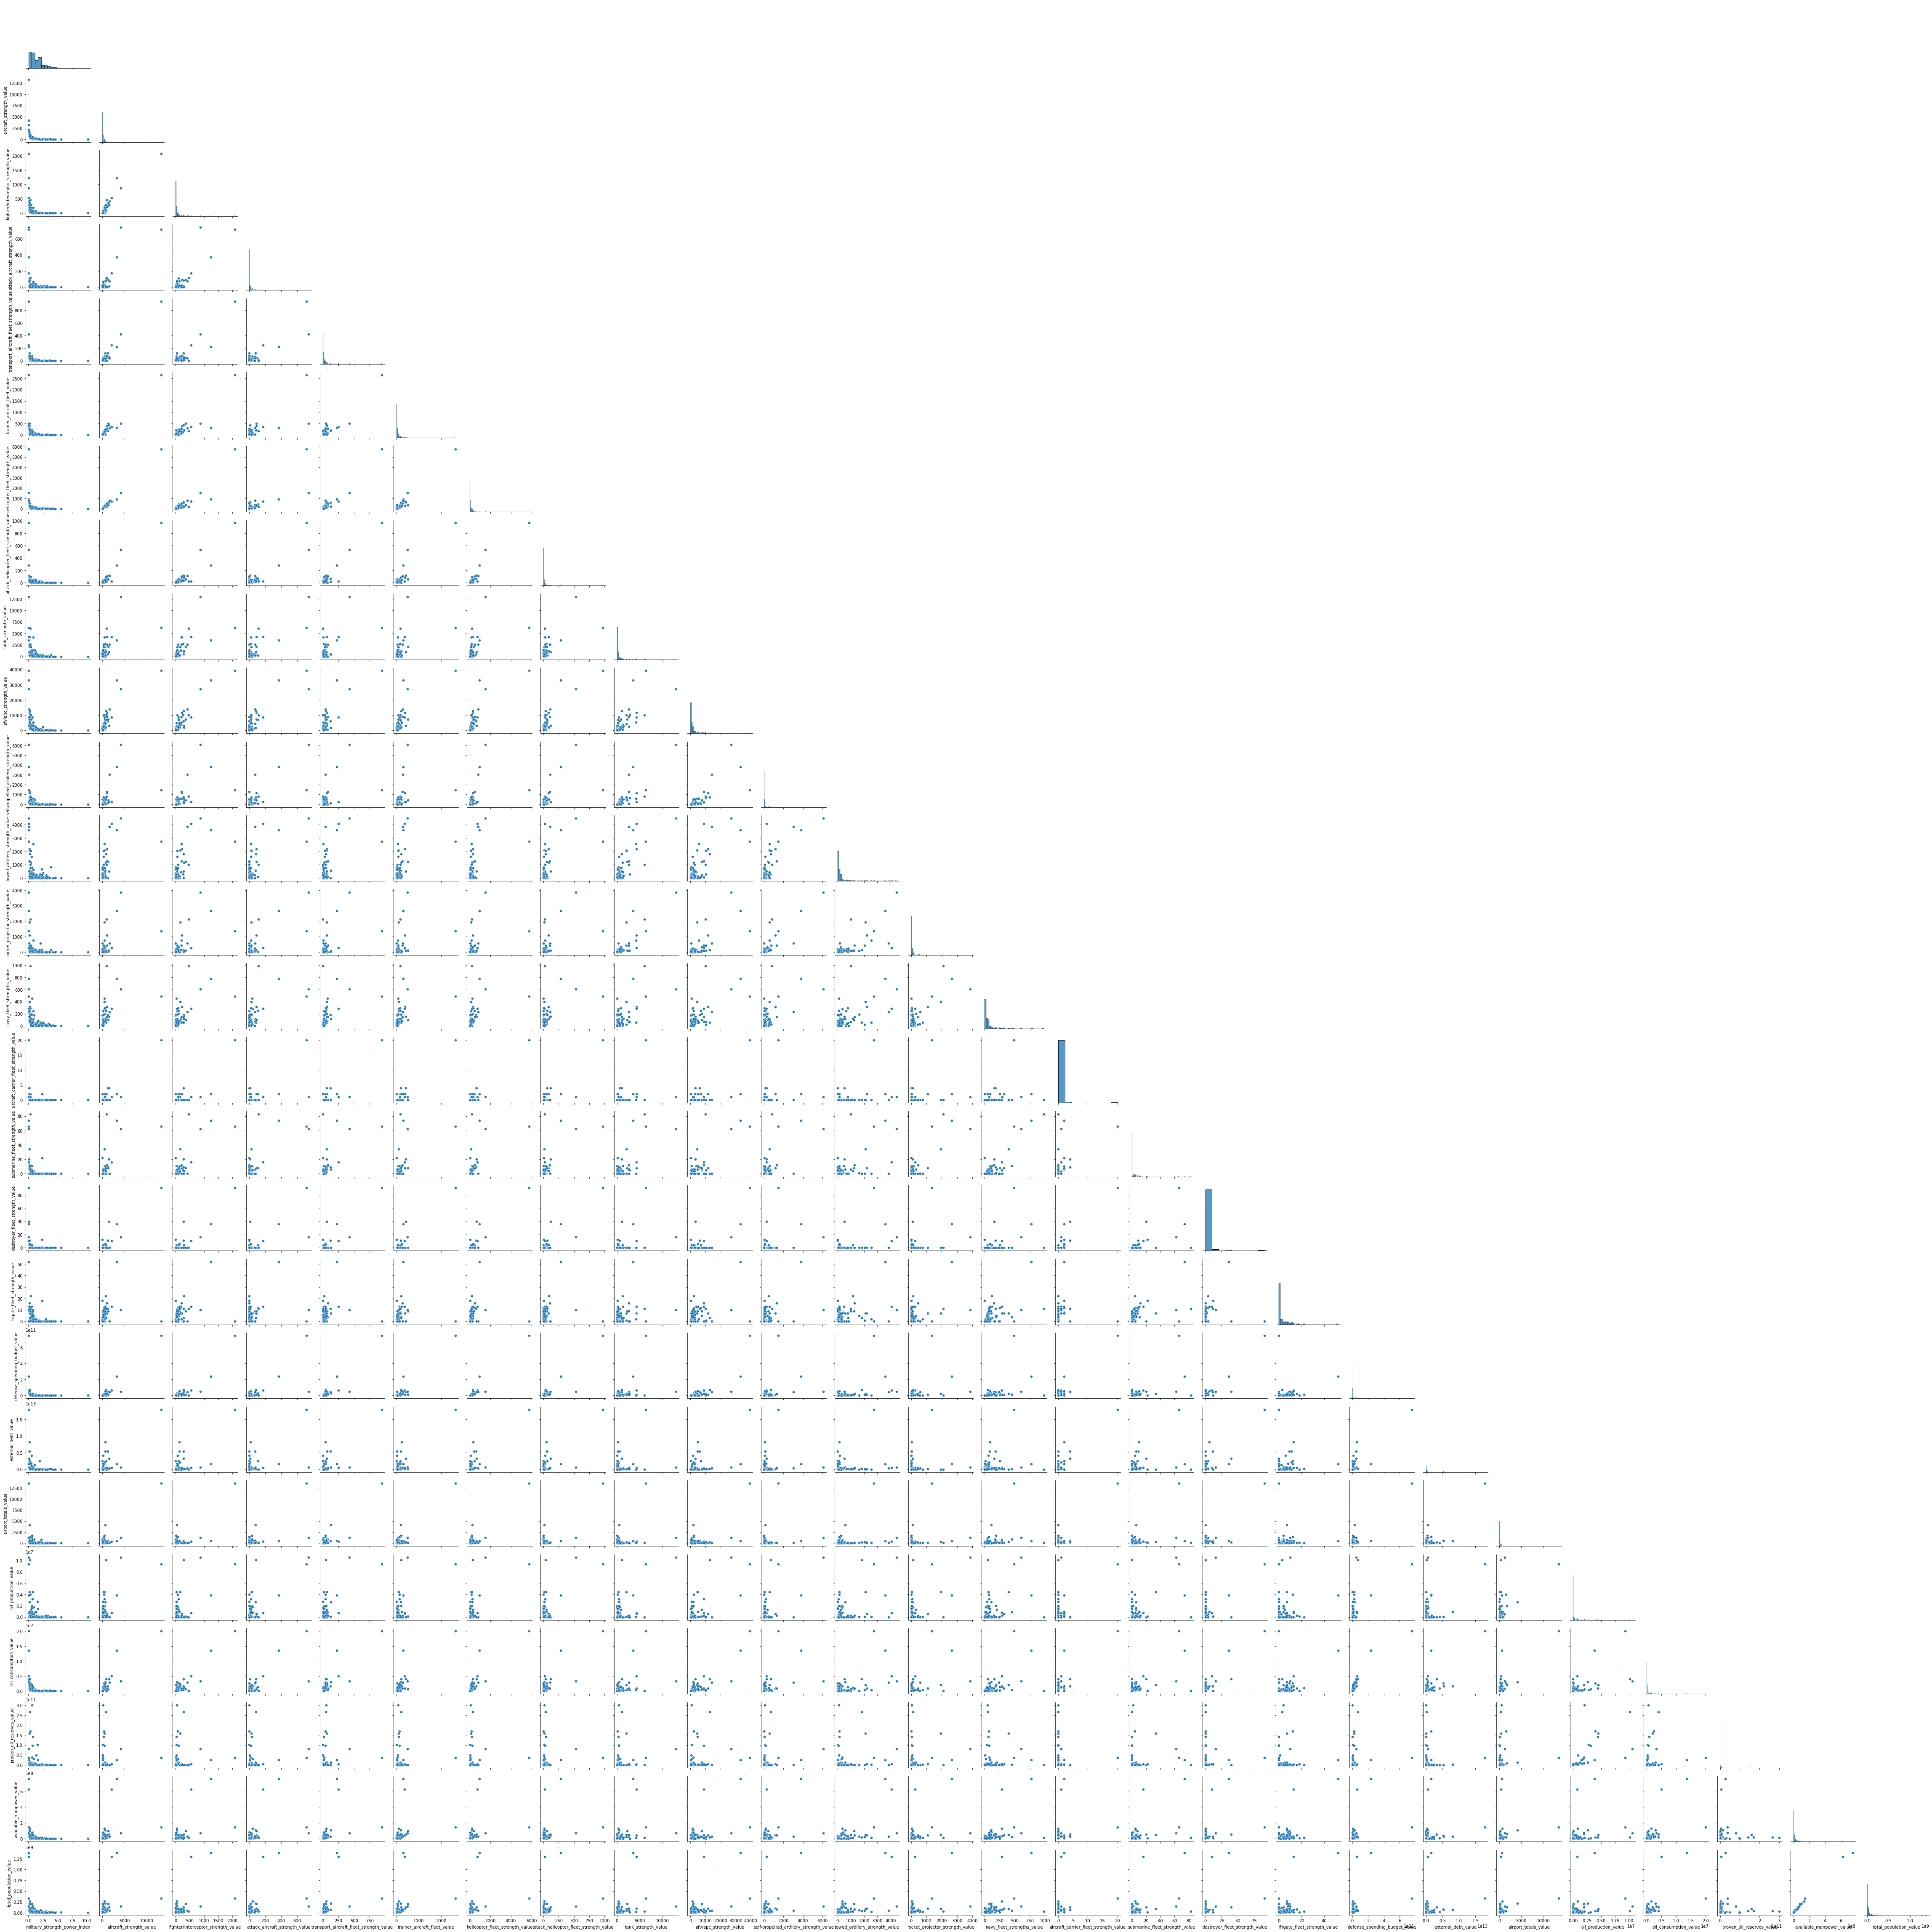

In [125]:
sns.pairplot(df, palette="inferno", corner=True);

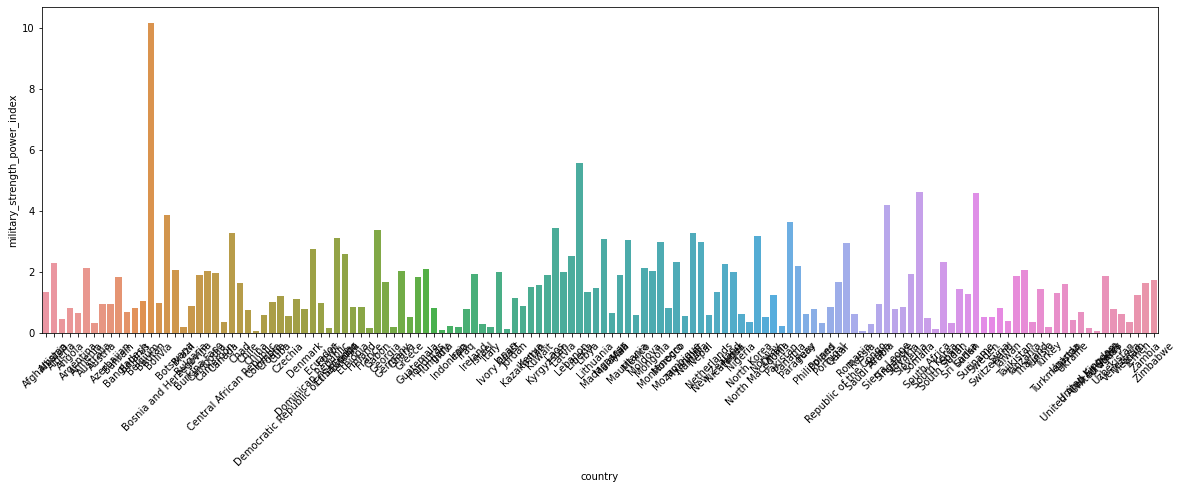

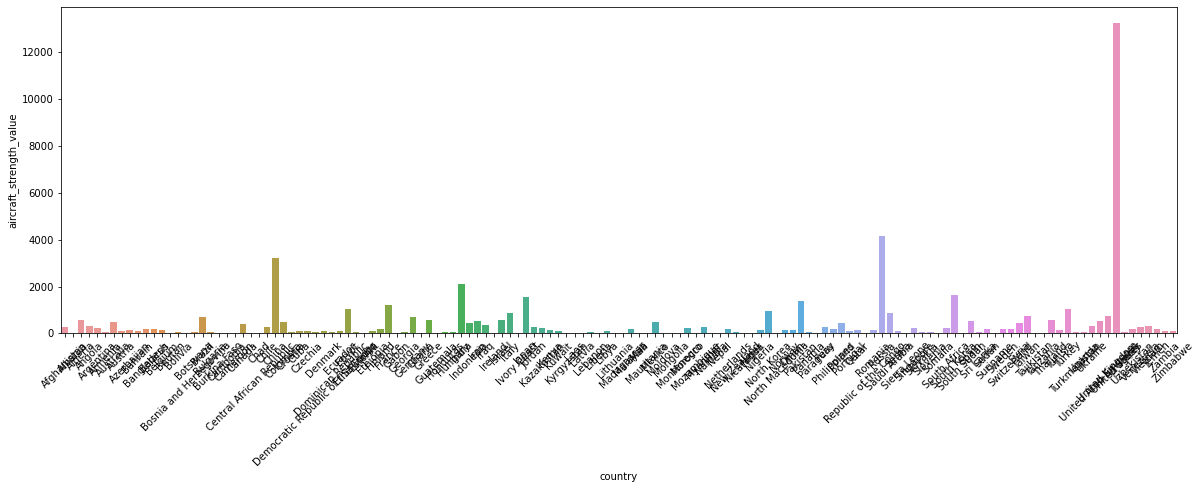

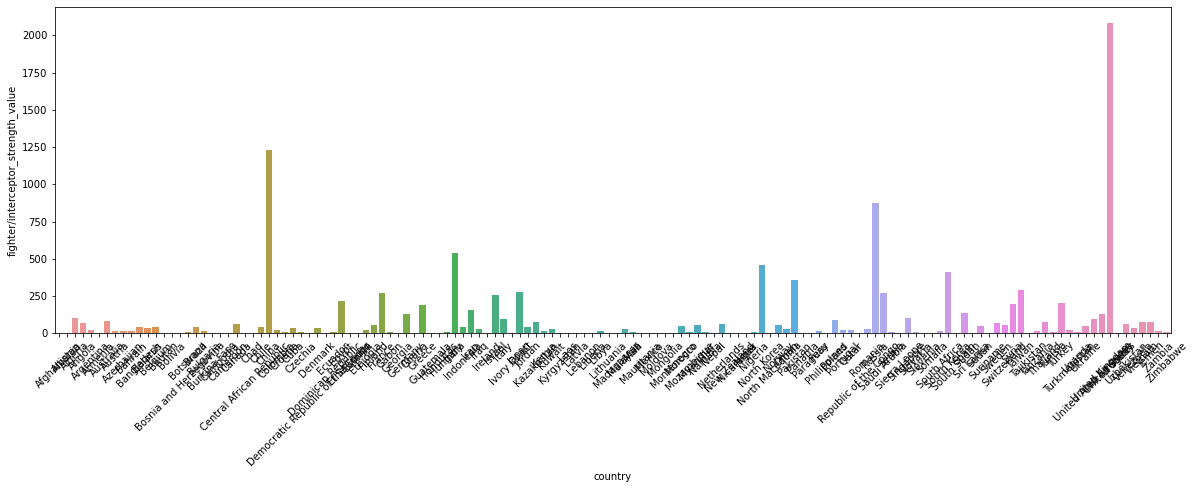

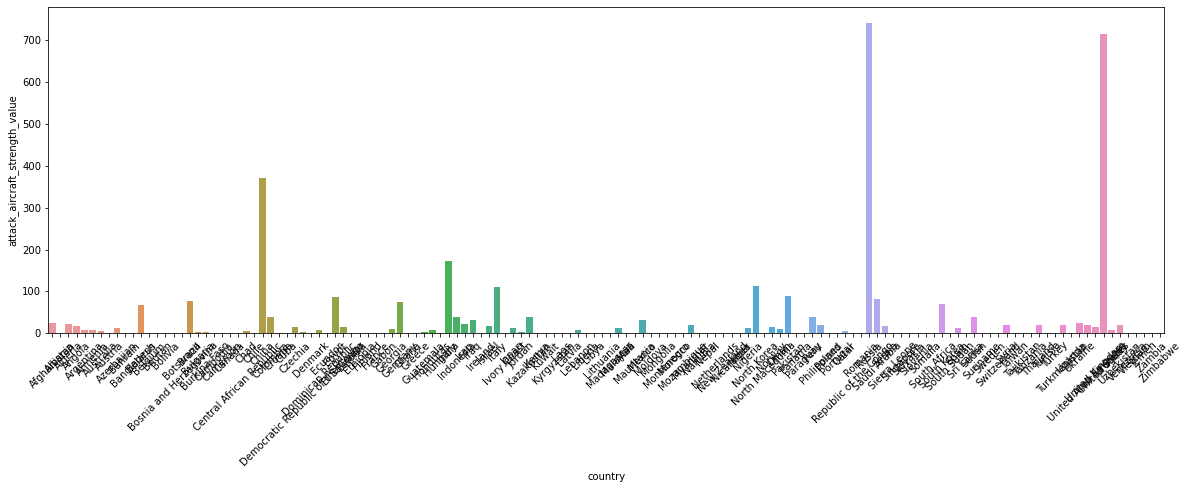

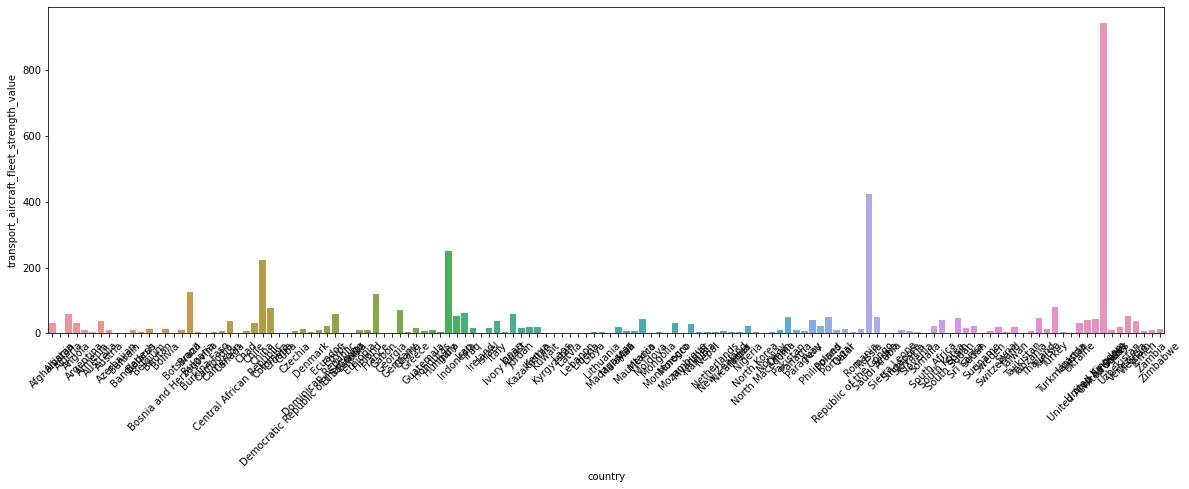

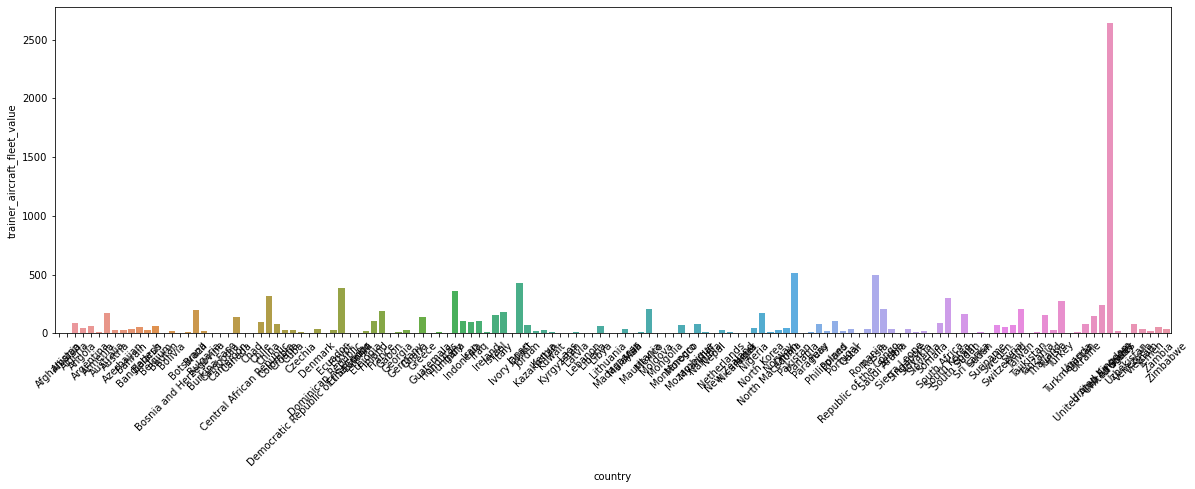

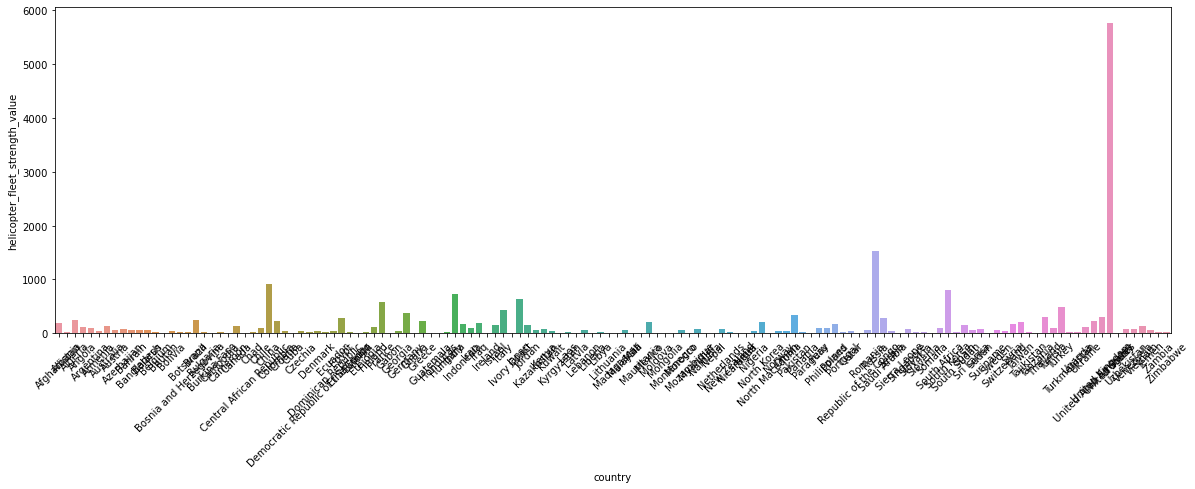

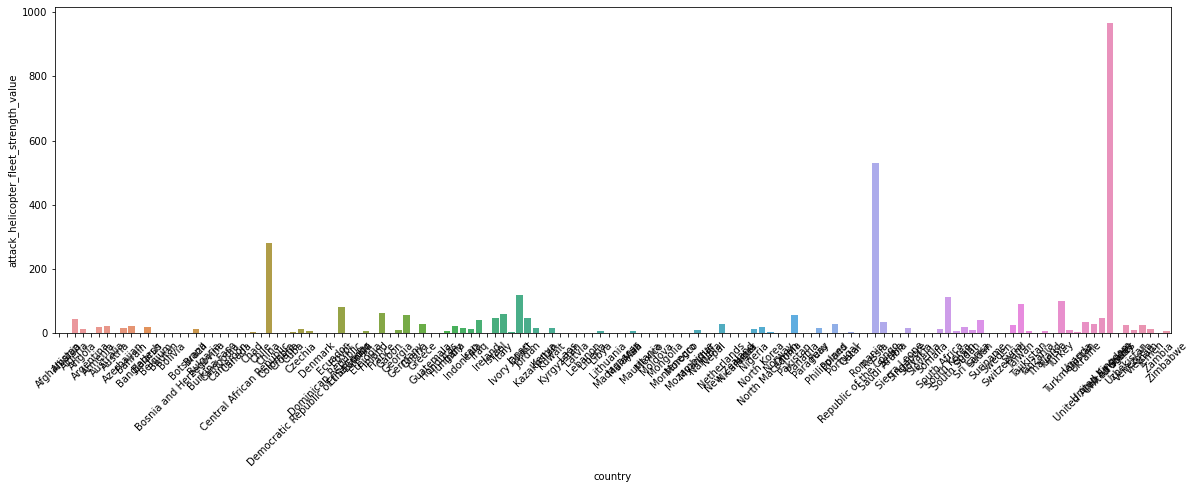

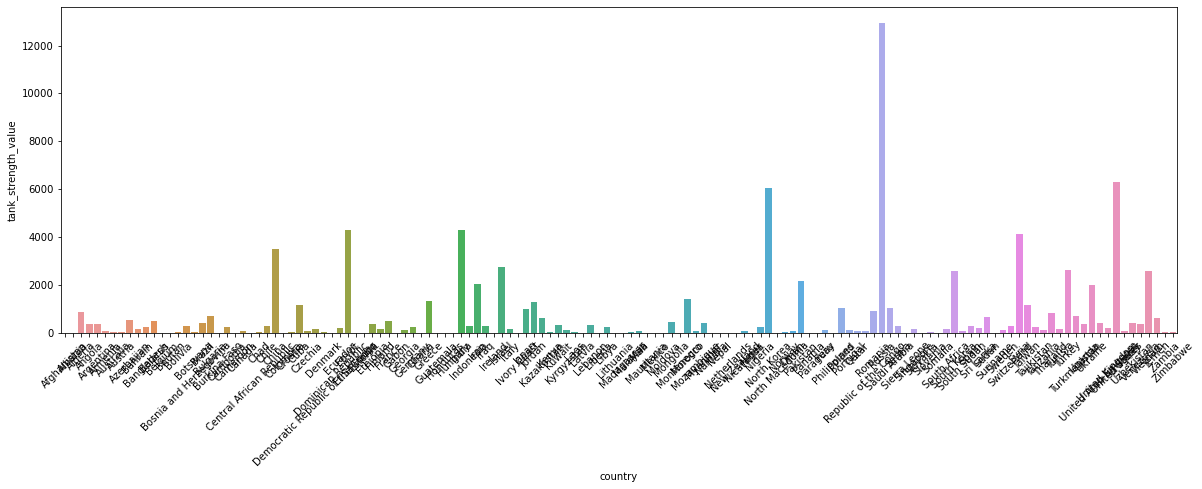

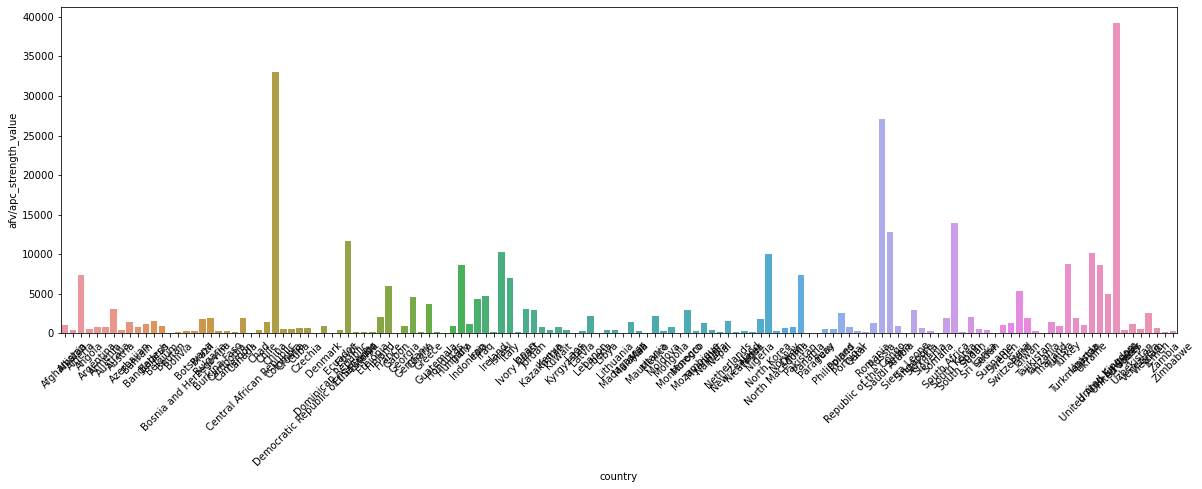

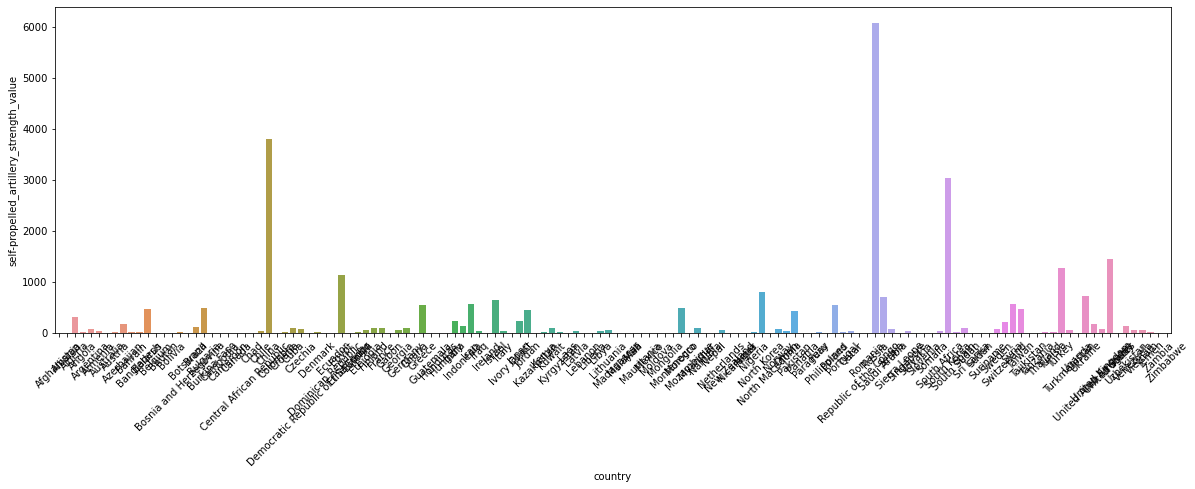

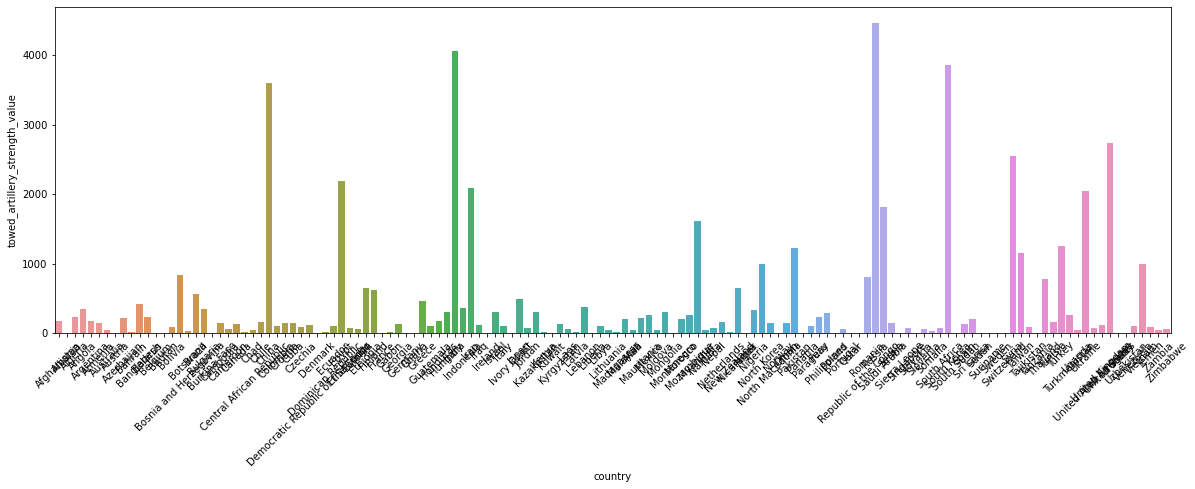

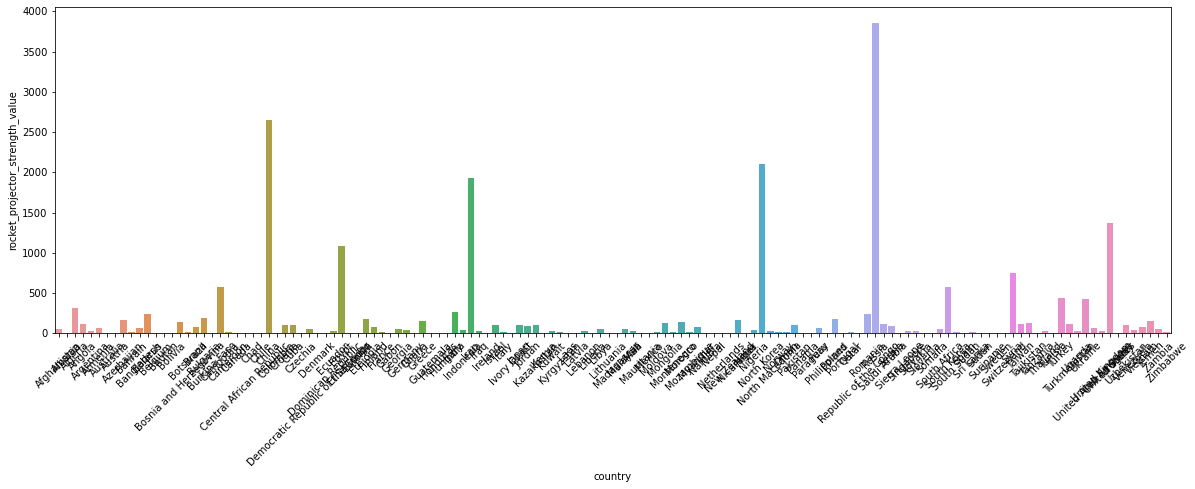

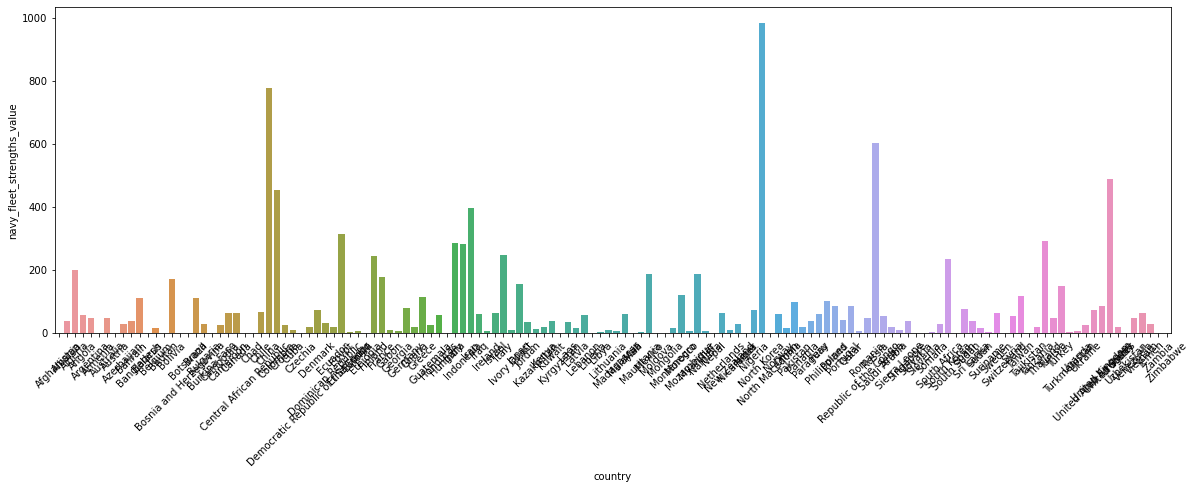

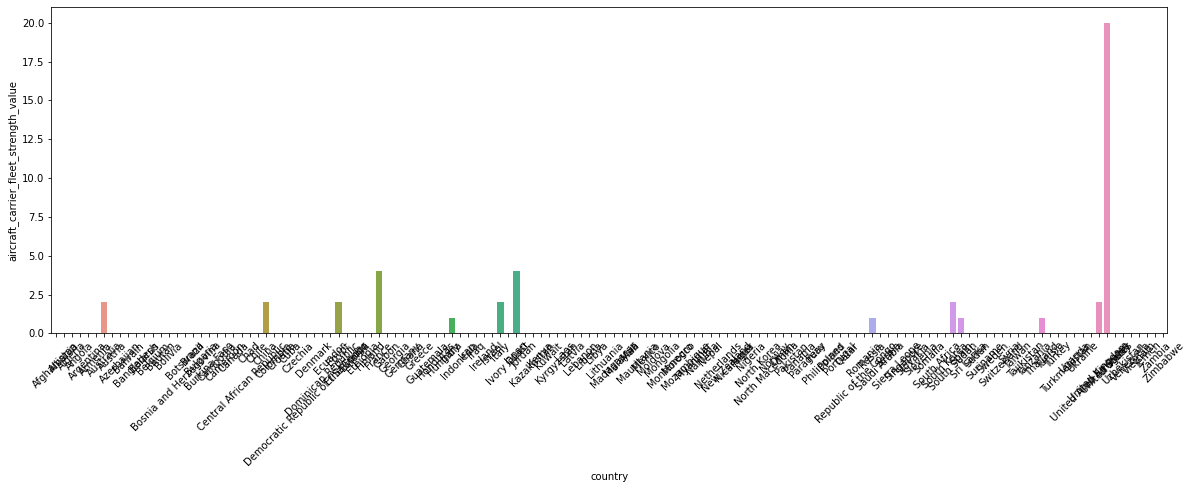

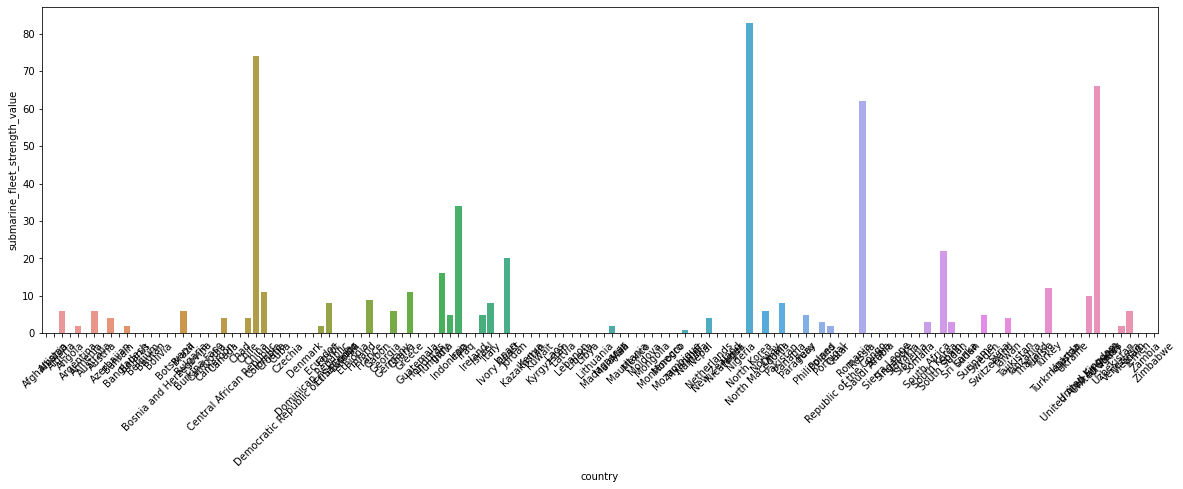

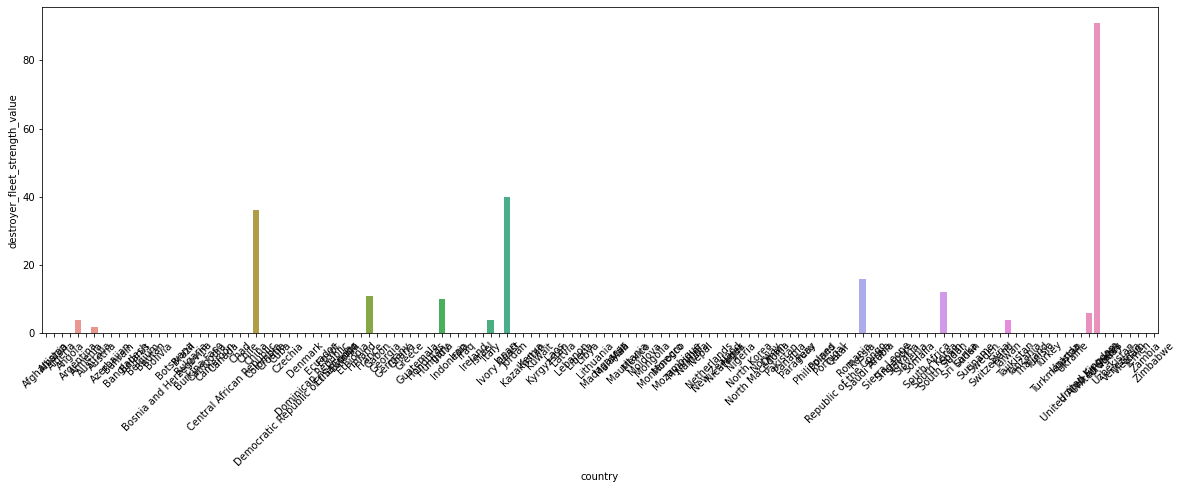

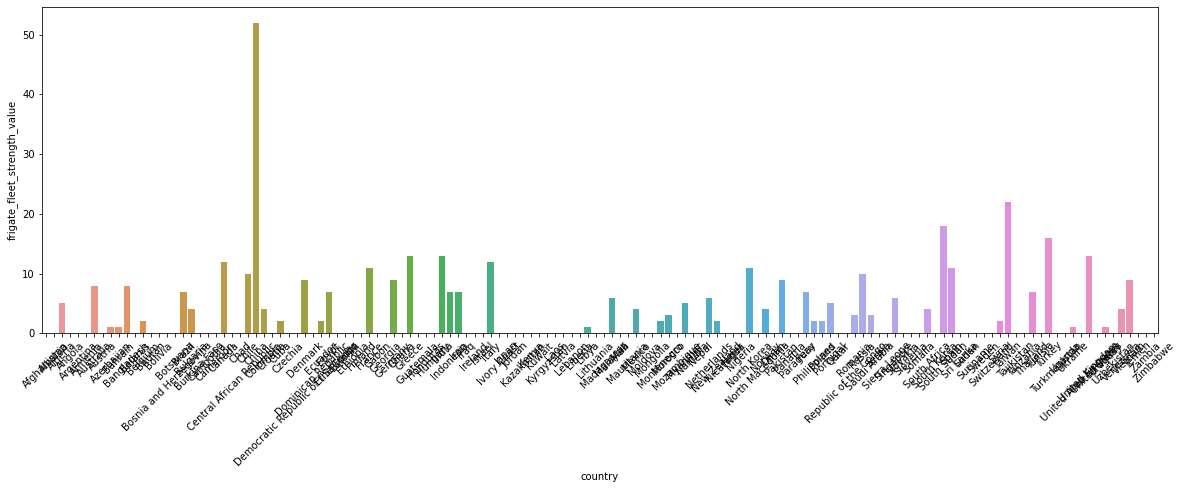

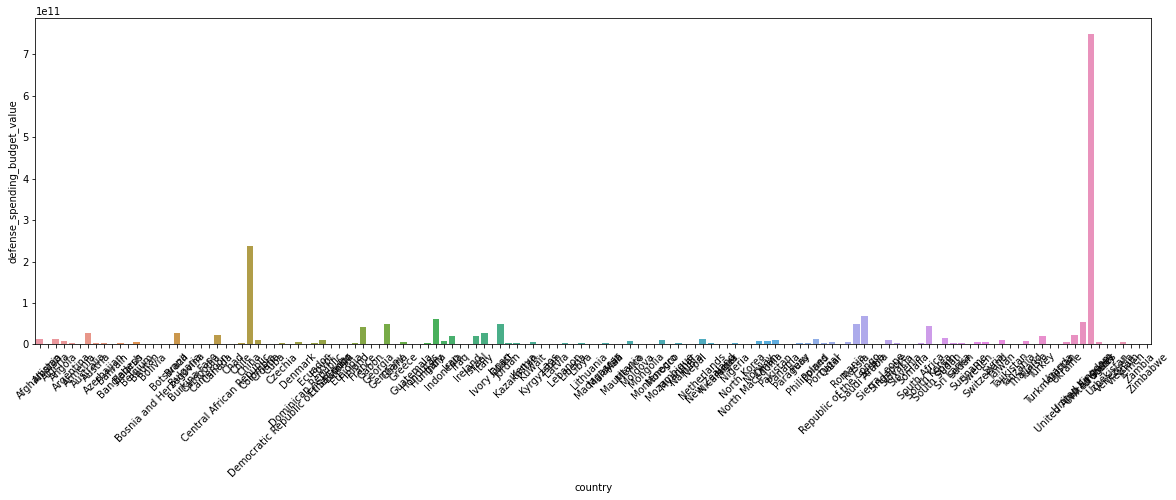

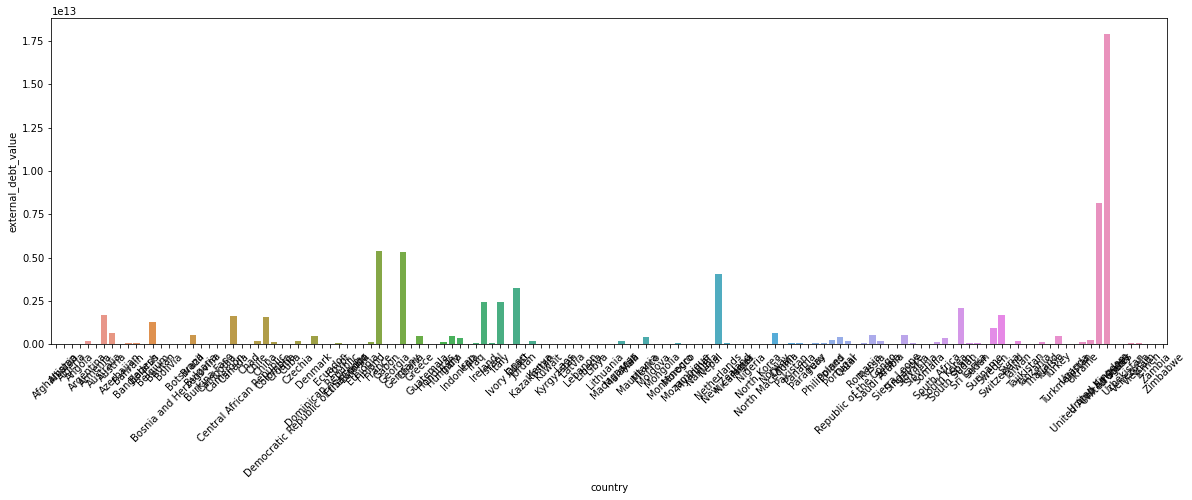

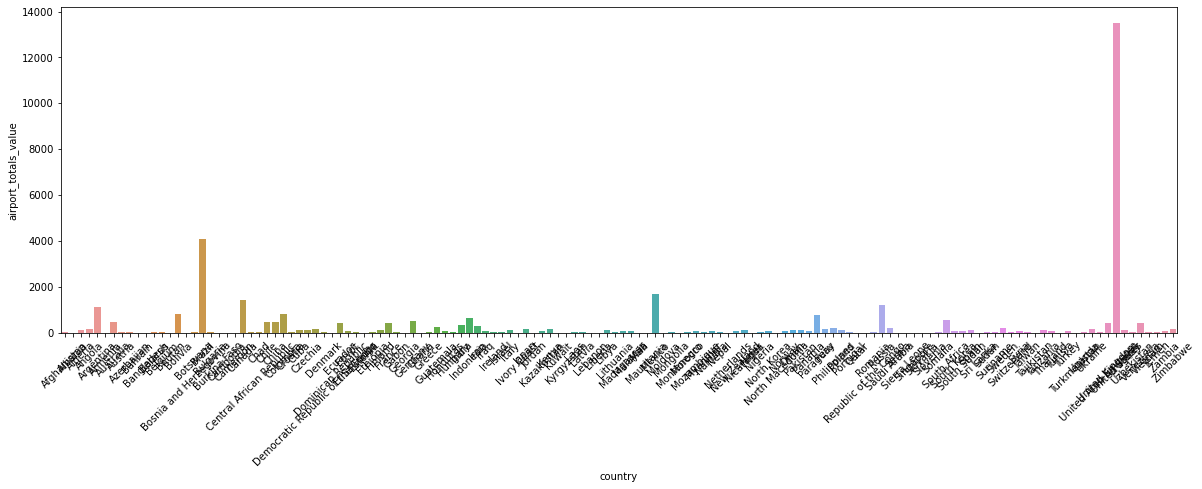

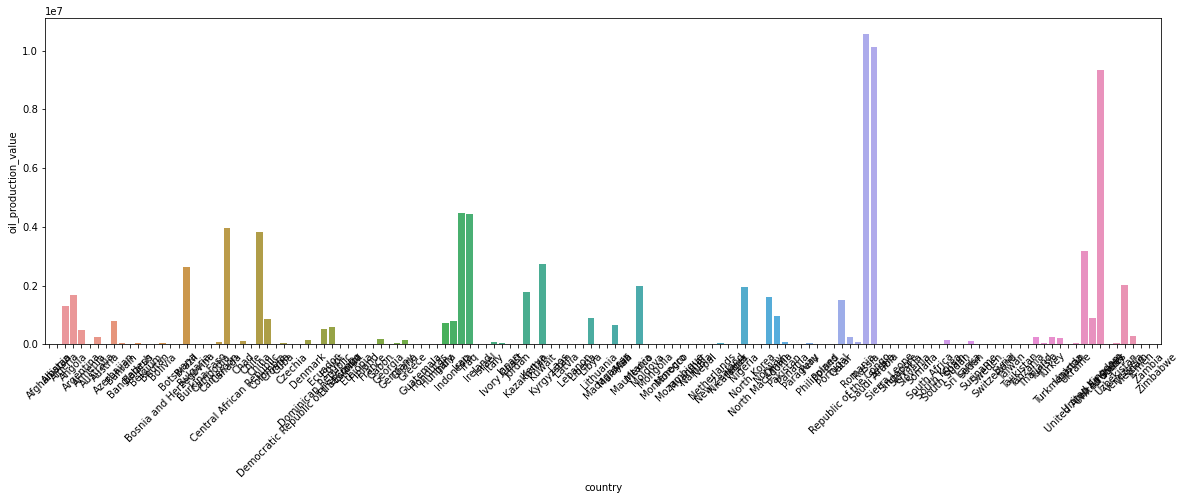

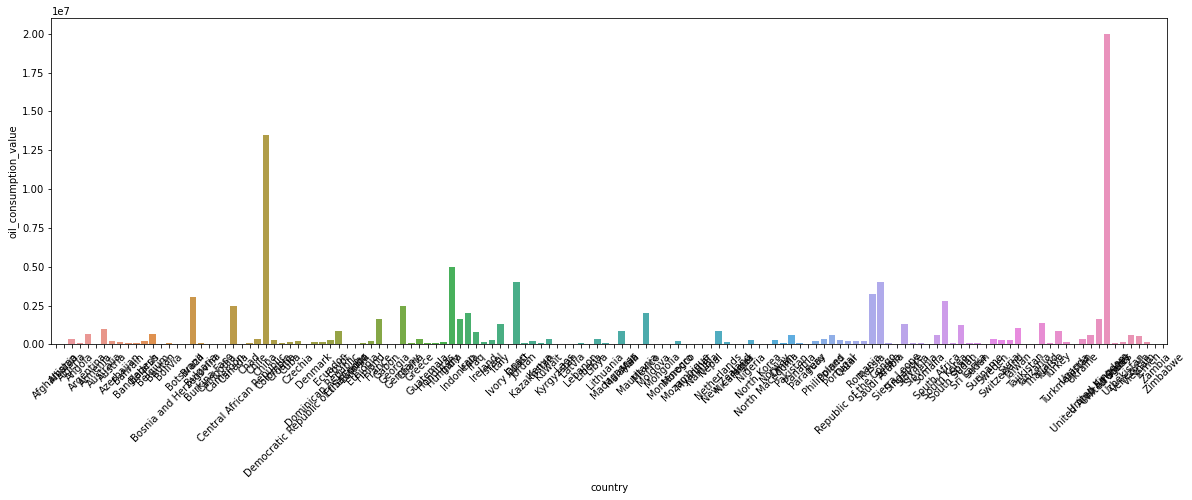

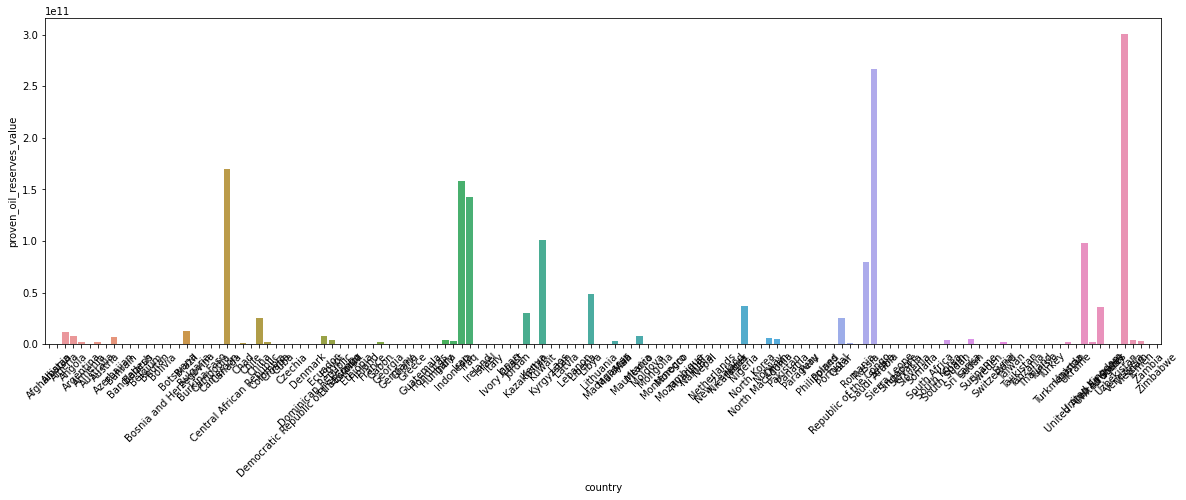

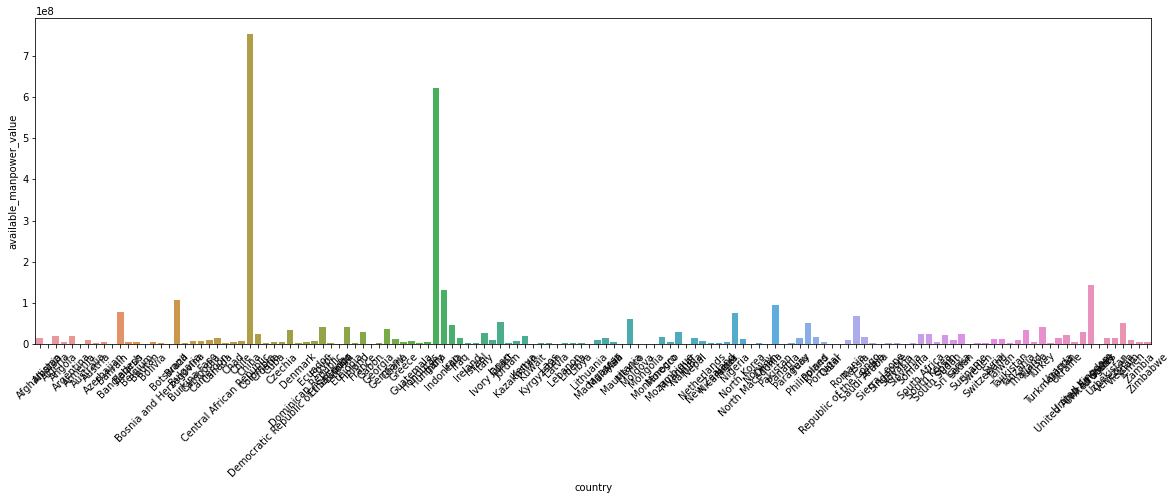

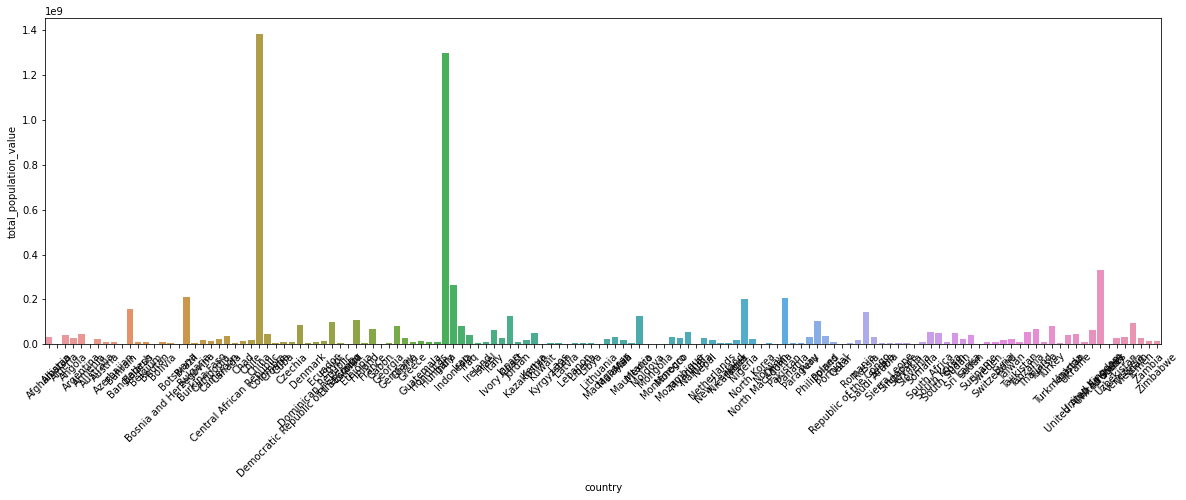

In [126]:
for col in df.columns:
    plt.figure(figsize = (20,6))
    sns.barplot(y = df[col], x = df.index, data = df)
    plt.xticks(rotation = 45);

## Descriptive statistics

In [127]:
df.describe().T

count             mean  \
military_strength_power_index           138.000            1.461   
aircraft_strength_value                 138.000          388.471   
fighter/interceptor_strength_value      138.000           81.565   
attack_aircraft_strength_value          138.000           25.761   
transport_aircraft_fleet_strength_value 138.000           30.232   
trainer_aircraft_fleet_value            138.000           82.833   
helicopter_fleet_strength_value         138.000          154.065   
attack_helicopter_fleet_strength_value  138.000           25.623   
tank_strength_value                     138.000          646.565   
afv/apc_strength_value                  138.000         2485.696   
self-propelled_artillery_strength_value 138.000          212.159   
towed_artillery_strength_value          138.000          393.978   
rocket_projector_strength_value         138.000          156.935   
navy_fleet_strengths_value              138.000           76.362   
aircraft_carrier_fleet_strength_value   138.000            0.319   
submarine_fleet_strength_value          138.000            4.000   
destroyer_fleet_strength_value          138.000            1.710   
frigate_fleet_strength_value            138.000            2.935   
defense_spending_budget_value           138.000  13993631641.210   
external_debt_value                     138.000 519498263043.478   
airport_totals_value                    138.000          290.043   
oil_production_value                    138.000       585552.355   
oil_consumption_value                   138.000       702018.696   
proven_oil_reserves_value               138.000  11944118420.290   
available_manpower_value                138.000     25442969.935   
total_population_value                  138.000     53180584.652   

                                                      std           min  \
military_strength_power_index                       1.324         0.061   
aircraft_strength_value                          1231.982         0.000   
fighter/interceptor_strength_value                230.325         0.000   
attack_aircraft_strength_value                     94.528         0.000   
transport_aircraft_fleet_strength_value            92.330         0.000   
trainer_aircraft_fleet_value                      240.804         0.000   
helicopter_fleet_strength_value                   520.184         0.000   
attack_helicopter_fleet_strength_value             97.326         0.000   
tank_strength_value                              1515.464         0.000   
afv/apc_strength_value                           5410.546         0.000   
self-propelled_artillery_strength_value           688.029         0.000   
towed_artillery_strength_value                    805.782         0.000   
rocket_projector_strength_value                   484.381         0.000   
navy_fleet_strengths_value                        140.822         0.000   
aircraft_carrier_fleet_strength_value               1.804         0.000   
submarine_fleet_strength_value                     12.632         0.000   
destroyer_fleet_strength_value                      9.155         0.000   
frigate_fleet_strength_value                        6.057         0.000   
defense_spending_budget_value             67311892724.125  13000000.000   
external_debt_value                     1847251527661.875 539400000.000   
airport_totals_value                             1212.967         2.000   
oil_production_value                          1667138.897         0.000   
oil_consumption_value                         2168810.056      2000.000   
proven_oil_reserves_value                 42750903273.129         0.000   
available_manpower_value                     84506975.276    132740.000   
total_population_value                      165108987.399    597927.000   

                                                   25%             50%  \
military_strength_power_index                    0.575           1.034   
aircraft_strength_value        

In [128]:
skew_vals = df.skew().sort_values(ascending=False)
skew_vals

defense_spending_budget_value             9.959
airport_totals_value                      9.845
aircraft_carrier_fleet_strength_value     9.772
helicopter_fleet_strength_value           9.497
trainer_aircraft_fleet_value              9.035
aircraft_strength_value                   8.789
transport_aircraft_fleet_strength_value   7.951
attack_helicopter_fleet_strength_value    7.883
destroyer_fleet_strength_value            7.850
available_manpower_value                  7.377
total_population_value                    7.110
external_debt_value                       7.052
oil_consumption_value                     6.874
attack_aircraft_strength_value            6.489
self-propelled_artillery_strength_value   6.258
fighter/interceptor_strength_value        6.226
rocket_projector_strength_value           5.345
tank_strength_value                       5.082
proven_oil_reserves_value                 4.881
submarine_fleet_strength_value            4.790
afv/apc_strength_value                  

In [129]:
skew_limit = 0.5 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models. 
skew_vals = df.skew()
skew_cols = skew_vals[abs(skew_vals)> skew_limit].sort_values(ascending=False)
skew_cols 

defense_spending_budget_value             9.959
airport_totals_value                      9.845
aircraft_carrier_fleet_strength_value     9.772
helicopter_fleet_strength_value           9.497
trainer_aircraft_fleet_value              9.035
aircraft_strength_value                   8.789
transport_aircraft_fleet_strength_value   7.951
attack_helicopter_fleet_strength_value    7.883
destroyer_fleet_strength_value            7.850
available_manpower_value                  7.377
total_population_value                    7.110
external_debt_value                       7.052
oil_consumption_value                     6.874
attack_aircraft_strength_value            6.489
self-propelled_artillery_strength_value   6.258
fighter/interceptor_strength_value        6.226
rocket_projector_strength_value           5.345
tank_strength_value                       5.082
proven_oil_reserves_value                 4.881
submarine_fleet_strength_value            4.790
afv/apc_strength_value                  

In [130]:
#Interpreting Skewness 

for skew in skew_vals:
    if -0.5 < skew < 0.5:
        print ("A skewness value of", '\033[1m', Fore.GREEN, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.GREEN, "symmetric", '\033[0m')
    elif  -0.5 < skew < -1.0 or 0.5 < skew < 1.0:
        print ("A skewness value of", '\033[1m', Fore.YELLOW, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.YELLOW, "moderately skewed", '\033[0m')
    else:
        print ("A skewness value of", '\033[1m', Fore.RED, skew, '\033[0m', "means that the distribution is approx.", '\033[1m', Fore.RED, "highly skewed", '\033[0m')

A skewness value of   2.6706592171090633  means that the distribution is approx.   highly skewed 
A skewness value of   8.789333213231357  means that the distribution is approx.   highly skewed 
A skewness value of   6.225776745899961  means that the distribution is approx.   highly skewed 
A skewness value of   6.489261954280916  means that the distribution is approx.   highly skewed 
A skewness value of   7.95096255063359  means that the distribution is approx.   highly skewed 
A skewness value of   9.035121167203796  means that the distribution is approx.   highly skewed 
A skewness value of   9.496532868859475  means that the distribution is approx.   highly skewed 
A skewness value of   7.882557750772219  means that the distribution is approx.   highly skewed 
A skewness value of   5.081714659457636  means that the distribution is approx.   highly skewed 
A skewness value of   4.582304838220883  means that the distribution is approx.   highly skewed 
A skewness value of   6.257622

In [131]:
kurtosis_vals = df.kurtosis().sort_values(ascending=False)
kurtosis_vals

defense_spending_budget_value             106.869
airport_totals_value                      105.399
aircraft_carrier_fleet_strength_value     105.211
helicopter_fleet_strength_value           100.829
trainer_aircraft_fleet_value               94.603
aircraft_strength_value                    88.850
transport_aircraft_fleet_strength_value    73.350
destroyer_fleet_strength_value             69.845
attack_helicopter_fleet_strength_value     69.606
external_debt_value                        59.907
available_manpower_value                   57.864
oil_consumption_value                      54.228
total_population_value                     53.839
fighter/interceptor_strength_value         46.648
self-propelled_artillery_strength_value    45.347
attack_aircraft_strength_value             45.044
tank_strength_value                        33.708
rocket_projector_strength_value            32.166
frigate_fleet_strength_value               31.408
proven_oil_reserves_value                  25.894


In [132]:
#Calculating Kurtosis 

kurtosis_limit = 7 # This is our threshold-limit to evaluate skewness. Overall below abs(1) seems acceptable for the linear models.
kurtosis_vals = df.kurtosis()
kurtosis_cols = kurtosis_vals[abs(kurtosis_vals) > kurtosis_limit].sort_values(ascending=False)
kurtosis_cols

defense_spending_budget_value             106.869
airport_totals_value                      105.399
aircraft_carrier_fleet_strength_value     105.211
helicopter_fleet_strength_value           100.829
trainer_aircraft_fleet_value               94.603
aircraft_strength_value                    88.850
transport_aircraft_fleet_strength_value    73.350
destroyer_fleet_strength_value             69.845
attack_helicopter_fleet_strength_value     69.606
external_debt_value                        59.907
available_manpower_value                   57.864
oil_consumption_value                      54.228
total_population_value                     53.839
fighter/interceptor_strength_value         46.648
self-propelled_artillery_strength_value    45.347
attack_aircraft_strength_value             45.044
tank_strength_value                        33.708
rocket_projector_strength_value            32.166
frigate_fleet_strength_value               31.408
proven_oil_reserves_value                  25.894


# Data Preprocessing

# Modelling

## Hopkins Test 
#### Assess the clusterability of a dataset. A score between 0 and 1, a score around 0.5 express no clusterability, a score tending to 1 express an uniform distrubution so clustering can't be useful and  0 express  not an uniform distrubution hence clusterering can be useful.

In [136]:
from pyclustertend import hopkins

In [137]:
hopkins(df, df.shape[0])

0.07169588072925308

In [138]:
df1 = df.copy()
df2 = df.copy()
df3 = df.copy()

In [139]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, scale

In [140]:
hopkins(scale(df1), df1.shape[0])

0.07627015680751253

In [141]:
hopkins(MinMaxScaler().fit_transform(df2), df2.shape[0])

0.08327281784667619

In [142]:
hopkins(StandardScaler().fit_transform(df3), df3.shape[0])

0.07548445320515038

In [143]:
hopkins(scale(df), df.shape[0])

0.07569798930486271

## Clustering with K-means

In [144]:
df1 = df.copy()

In [145]:
df1.reset_index(inplace=True)

In [146]:
X = df1.drop("country", axis = 1)

In [147]:
scaler = scale

In [148]:
X_scaled = pd.DataFrame(scaler(X))

In [149]:
X_scaled.head(1)

0      1      2      3      4      5     6      7      8      9      10  \
0 -0.088 -0.105 -0.355 -0.008 -0.003 -0.345 0.064 -0.264 -0.428 -0.264 -0.309   

      11     12     13     14     15     16     17     18     19     20  \
0 -0.272 -0.222 -0.544 -0.177 -0.318 -0.187 -0.486 -0.030 -0.281 -0.204   

      21     22     23     24     25  
0 -0.353 -0.322 -0.280 -0.132 -0.111

In [150]:
X_scaled.shape

(138, 26)

In [151]:
K_means_model = KMeans(random_state = 101)

<IPython.core.display.Javascript object>

In [163]:
K_means_model.fit_predict(X_scaled)

array([3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       6, 3, 3, 3, 2, 0, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 7, 0, 6, 6, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 5,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 6, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 6, 0, 1, 3,
       3, 6, 0, 3, 3, 3])

In [164]:
# K_means_model.fit(X_scaled)

In [95]:
# K_means_model.labels_

In [96]:
# X["clusters"] = K_means_model.labels_

In [97]:
# X

### Elbow Method 
We use this method to find optimal k value by looking up to break point of graph. 

In [165]:
ssd = []

K = range(2,10)

for k in K:
    model = KMeans(n_clusters =k, random_state=101)
    model.fit(X_scaled)
    ssd.append(model.inertia_)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Text(0.5, 1.0, 'elbow method')

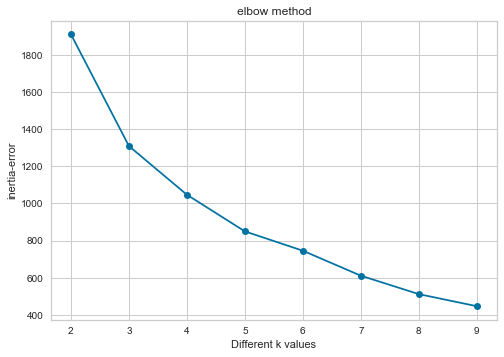

In [166]:
plt.plot(K, ssd, "bo-")
plt.xlabel("Different k values")
plt.ylabel("inertia-error") 
plt.title("elbow method") 

In [167]:
ssd # sum of squared distance

[1911.0076460430041,
 1309.085053797226,
 1046.8544488444888,
 849.4898696876932,
 745.2500852750208,
 610.6455812399118,
 511.3419393774911,
 446.2352146056185]

In [168]:
pd.Series(ssd).diff()

0        NaN
1   -601.923
2   -262.231
3   -197.365
4   -104.240
5   -134.605
6    -99.304
7    -65.107
dtype: float64

In [169]:
df1_diff =pd.DataFrame(-pd.Series(ssd).diff()).rename(index = lambda x : x+1)
df1_diff

0
1     NaN
2 601.923
3 262.231
4 197.365
5 104.240
6 134.605
7  99.304
8  65.107

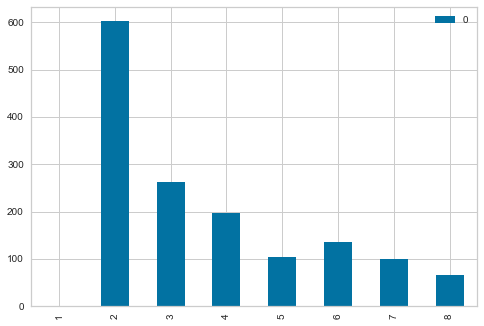

In [170]:
df1_diff.plot(kind='bar');

<IPython.core.display.Javascript object>

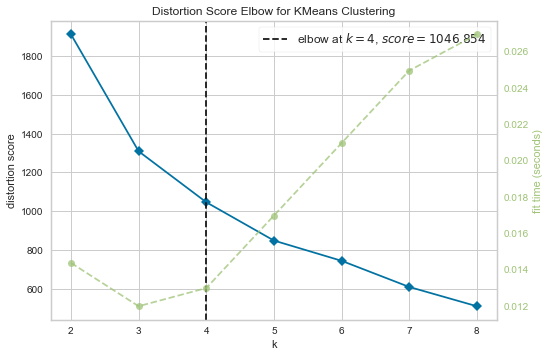

In [171]:
from yellowbrick.cluster import KElbowVisualizer

model_ = KMeans(random_state=101)
visualizer = KElbowVisualizer(model_, k=(2,9))

visualizer.fit(X_scaled)        # Fit the data to the visualizer
visualizer.show();

### Silhouette analysis

In [172]:
from sklearn.metrics import silhouette_score

In [173]:
silhouette_score(X_scaled, K_means_model.labels_)

0.46564969139552

In [174]:
range_n_clusters = range(2,9)
for num_clusters in range_n_clusters:
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, random_state=101)
    kmeans.fit(X_scaled)
    cluster_labels = kmeans.labels_
    # silhouette score
    silhouette_avg = silhouette_score(X_scaled, cluster_labels)
    print(f"For n_clusters={num_clusters}, the silhouette score is {silhouette_avg}")

<IPython.core.display.Javascript object>

For n_clusters=2, the silhouette score is 0.8635930041608607


<IPython.core.display.Javascript object>

For n_clusters=3, the silhouette score is 0.8007097142699179


<IPython.core.display.Javascript object>

For n_clusters=4, the silhouette score is 0.5108366480674227


<IPython.core.display.Javascript object>

For n_clusters=5, the silhouette score is 0.47345506679260707


<IPython.core.display.Javascript object>

For n_clusters=6, the silhouette score is 0.4910918969363465


<IPython.core.display.Javascript object>

For n_clusters=7, the silhouette score is 0.47549187252626846


<IPython.core.display.Javascript object>

For n_clusters=8, the silhouette score is 0.46564969139552


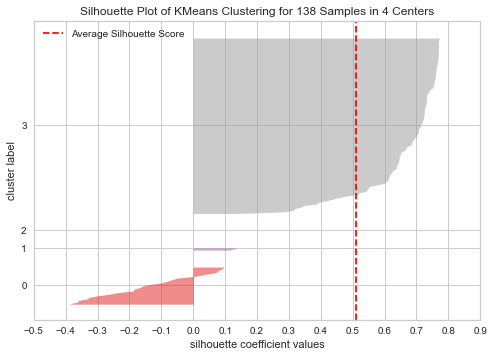

In [176]:
from sklearn.cluster import KMeans

from yellowbrick.cluster import SilhouetteVisualizer

model3 = KMeans(n_clusters = 4, random_state=101)
visualizer = SilhouetteVisualizer(model3)

visualizer.fit(X_scaled)    # Fit the data to the visualizer
visualizer.poof();

### Model Building and label visualisation

In [177]:
model = KMeans(n_clusters = 4, random_state=101)
model.fit_predict(X_scaled)

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [178]:
model.labels_

array([3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3,
       0, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 0, 3, 3, 0,
       3, 0, 3, 3, 3, 0, 0, 0, 3, 3, 0, 0, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0,
       3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 0, 3, 3, 3, 3, 3, 3, 3,
       0, 3, 3, 3, 3, 3, 3, 3, 0, 0, 3, 3, 0, 3, 0, 3, 3, 0, 3, 0, 2, 3,
       3, 3, 0, 3, 3, 3])

In [179]:
X["clusters"] = model.fit_predict(X_scaled)

In [180]:
X.head()

military_strength_power_index  aircraft_strength_value  \
0                          1.344                      260   
1                          2.314                       19   
2                          0.466                      551   
3                          0.838                      295   
4                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1                  250000000.000       9505000000.000                     4   
2      

In [181]:
X.clusters.value_counts()

3    111
0     24
1      2
2      1
Name: clusters, dtype: int64

In [182]:
df1.head()

country  military_strength_power_index  aircraft_strength_value  \
0  Afghanistan                          1.344                      260   
1      Albania                          2.314                       19   
2      Algeria                          0.466                      551   
3       Angola                          0.838                      295   
4    Argentina                          0.652                      227   

   fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                   0                              25   
1                                   0                               0   
2                                 103                              22   
3                                  72                              18   
4                                  24                               7   

   transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                       30                             0   
1                                        0                             0   
2                                       59                            87   
3                                       30                            47   
4                                        9                            64   

   helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                              187                                       0   
1                               19                                       0   
2                              257                                      45   
3                              126                                      15   
4                              100                                       0   

   tank_strength_value  afv/apc_strength_value  \
0                    0                    1062   
1                    0                     467   
2                  880                    7361   
3                  379                     595   
4                  370                     739   

   self-propelled_artillery_strength_value  towed_artillery_strength_value  \
0                                        0                             176   
1                                        0                               0   
2                                      320                             240   
3                                       28                             357   
4                                       83                             172   

   rocket_projector_strength_value  navy_fleet_strengths_value  \
0                               50                       0.000   
1                                0                      38.000   
2                              316                     201.000   
3                              115                      57.000   
4                               26                      49.000   

   aircraft_carrier_fleet_strength_value  submarine_fleet_strength_value  \
0                                  0.000                           0.000   
1                                  0.000                           0.000   
2                                  0.000                           6.000   
3                                  0.000                           0.000   
4                                  0.000                           2.000   

   destroyer_fleet_strength_value  frigate_fleet_strength_value  \
0                           0.000                         0.000   
1                           0.000                         0.000   
2                           0.000                         5.000   
3                           0.000                         0.000   
4                           4.000                         0.000   

   defense_spending_budget_value  external_debt_value  airport_totals_value  \
0                12000000000.000       2840000000.000                    43   
1           

In [115]:
df1["predicted_clusters"] = model.fit_predict(X_scaled)

In [116]:
df1.tail(10)

country  military_strength_power_index  \
128  United Arab Emirates                          0.703   
129        United Kingdom                          0.172   
130         United States                          0.061   
131               Uruguay                          1.891   
132            Uzbekistan                          0.809   
133             Venezuela                          0.645   
134               Vietnam                          0.356   
135                 Yemen                          1.241   
136                Zambia                          1.646   
137              Zimbabwe                          1.758   

     aircraft_strength_value  fighter/interceptor_strength_value  \
128                      538                                  98   
129                      733                                 133   
130                    13264                                2085   
131                       50                                   0   
132                      185                                  66   
133                      260                                  38   
134                      293                                  77   
135                      169                                  77   
136                      108                                  18   
137                       90                                  10   

     attack_aircraft_strength_value  transport_aircraft_fleet_strength_value  \
128                              20                                       40   
129                              15                                       44   
130                             715                                      945   
131                               7                                        9   
132                              20                                       18   
133                               0                                       52   
134                               0                                       38   
135                               0                                        8   
136                               0                                       11   
137                               0                                       14   

     trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
128                           145                              229   
129                           241                              312   
130                          2643                             5768   
131                            16                               13   
132                             2                               79   
133                            82                               86   
134                            36                              138   
135                            21                               61   
136                            52                               27   
137                            38                               28   

     attack_helicopter_fleet_strength_value  tank_strength_value  \
128                                      30                  434   
129                                      49                  227   
130                                     967                 6289   
131                                       0                   78   
132                                      25                  420   
133                                      10                  390   
134                                      25                 2615   
135                                      14                  620   
136                                       0                   75   
137                                       6                   42   

     afv/apc_strength_value  self-propelled_artillery_strength_value  \
128                    8691                                      183   
129                    5000                                    

In [117]:
df1[df1["predicted_clusters"]==0]["country"]

2             Algeria
17             Brazil
22             Canada
35              Egypt
40             France
43            Germany
45             Greece
49              India
50          Indonesia
51               Iran
54             Israel
55              Italy
57              Japan
87        North Korea
91           Pakistan
102      Saudi Arabia
110       South Korea
118             Syria
119            Taiwan
122          Thailand
124            Turkey
127           Ukraine
129    United Kingdom
134           Vietnam
Name: country, dtype: object

In [118]:
df1[df1["predicted_clusters"]==1]["country"]

26      China
101    Russia
Name: country, dtype: object

In [119]:
df1[df1["predicted_clusters"]==2]["country"]

130    United States
Name: country, dtype: object

In [120]:
df1[df1["predicted_clusters"]==3]["country"]

0      Afghanistan
1          Albania
3           Angola
4        Argentina
5          Armenia
          ...     
132     Uzbekistan
133      Venezuela
135          Yemen
136         Zambia
137       Zimbabwe
Name: country, Length: 111, dtype: object

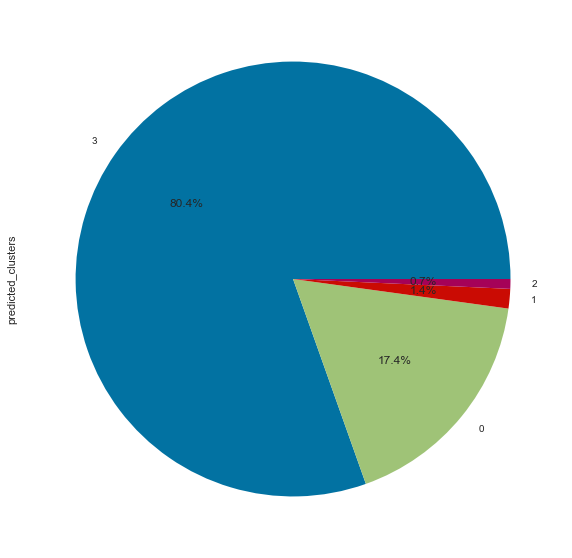

In [121]:
df1["predicted_clusters"].value_counts().plot(kind="pie", autopct='%1.1f%%',figsize=(10,10));

<AxesSubplot:xlabel='predicted_clusters', ylabel='count'>

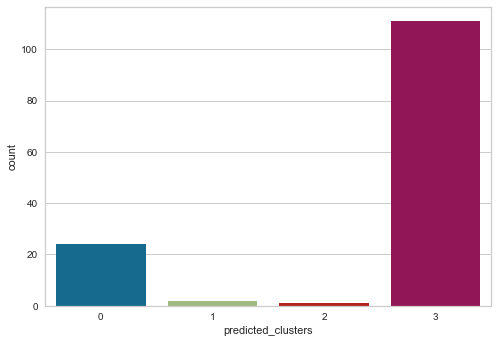

In [122]:
sns.countplot(x=df1["predicted_clusters"], data=df1)

### Evaluate 

## Hierarchical Clustering

In [227]:
df2 = df.reset_index()

In [228]:
df2

country  military_strength_power_index  aircraft_strength_value  \
0    Afghanistan                          1.344                      260   
1        Albania                          2.314                       19   
2        Algeria                          0.466                      551   
3         Angola                          0.838                      295   
4      Argentina                          0.652                      227   
..           ...                            ...                      ...   
133    Venezuela                          0.645                      260   
134      Vietnam                          0.356                      293   
135        Yemen                          1.241                      169   
136       Zambia                          1.646                      108   
137     Zimbabwe                          1.758                       90   

     fighter/interceptor_strength_value  attack_aircraft_strength_value  \
0                                     0                              25   
1                                     0                               0   
2                                   103                              22   
3                                    72                              18   
4                                    24                               7   
..                                  ...                             ...   
133                                  38                               0   
134                                  77                               0   
135                                  77                               0   
136                                  18                               0   
137                                  10                               0   

     transport_aircraft_fleet_strength_value  trainer_aircraft_fleet_value  \
0                                         30                             0   
1                                          0                             0   
2                                         59                            87   
3                                         30                            47   
4                                          9                            64   
..                                       ...                           ...   
133                                       52                            82   
134                                       38                            36   
135                                        8                            21   
136                                       11                            52   
137                                       14                            38   

     helicopter_fleet_strength_value  attack_helicopter_fleet_strength_value  \
0                                187                                       0   
1                                 19                                       0   
2                                257                                      45   
3                                126                                      15   
4                                100                                       0   
..                               ...                                     ...   
133                               86                                      10   
134                              138                                      25   
135                               61                                      14   
136                               27                                       0   
137                               28                                       6   

     tank_strength_value  afv/apc_strength_value  \
0                      0                    1062   
1                      0                     467   
2                    880                    7361   
3                    379                     595   
4                    370             

In [235]:
df2 = df2.set_index("country")

In [236]:
X_scaled = scale(df2)

In [237]:
hopkins(X_scaled, X.shape[0])

0.07492261026789535

In [239]:
#!pip install pyclustertend
from pyclustertend import hopkins
hopkins(X_scaled, X.shape[0])

0.07627532627734661

### Dendogram

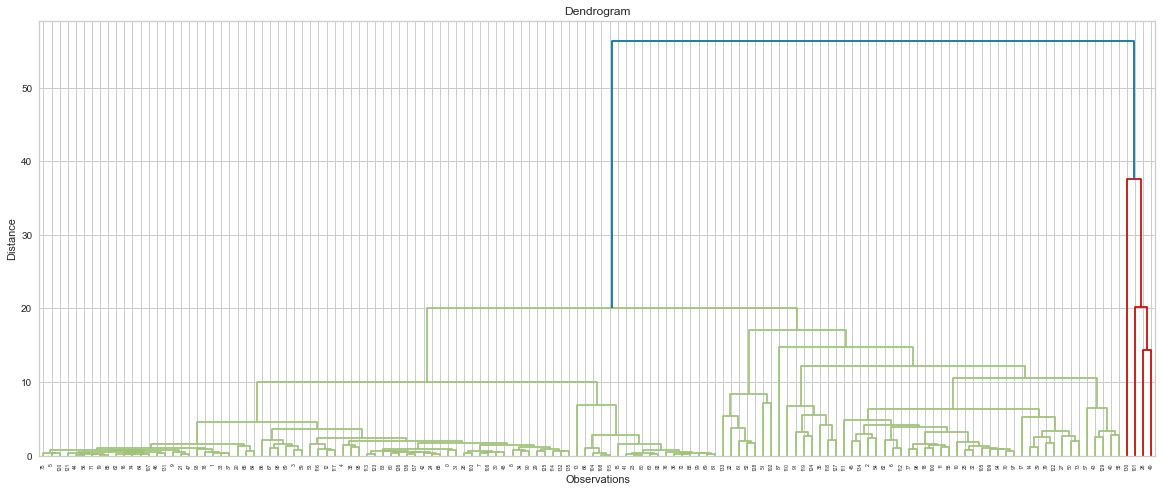

In [240]:
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize = (20,8))
plt.title("Dendrogram")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(linkage(X_scaled, method = "ward"), leaf_font_size = 5);

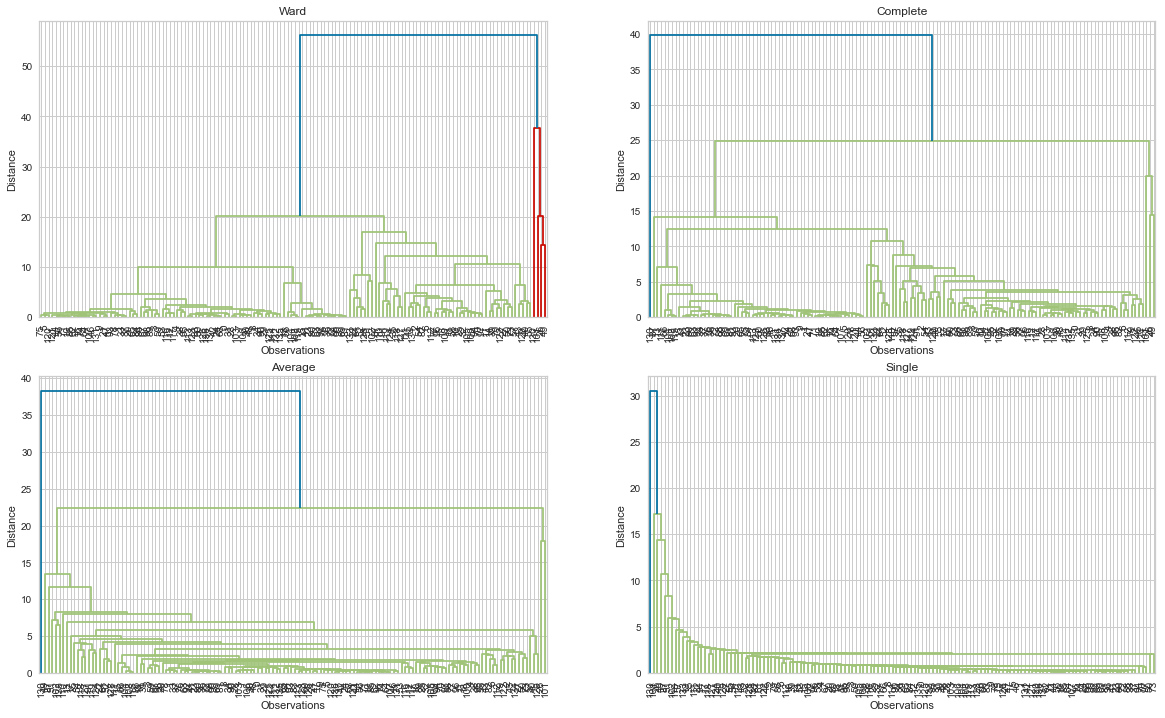

In [241]:
hc_ward = linkage(y = X_scaled, method = "ward")
hc_complete = linkage(X_scaled, "complete")
hc_average = linkage(X_scaled, "average")
hc_single = linkage(X_scaled, "single")

plt.figure(figsize = (20,12))

plt.subplot(221)
plt.title("Ward")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_ward, leaf_font_size = 10)

plt.subplot(222)
plt.title("Complete")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_complete, leaf_font_size = 10)

plt.subplot(223)
plt.title("Average")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_average, leaf_font_size = 10)

plt.subplot(224)
plt.title("Single")
plt.xlabel("Observations")
plt.ylabel("Distance")
dendrogram(hc_single, leaf_font_size = 10);

In [242]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
K = range(2,10)

for k in K:
    model_labels = AgglomerativeClustering(n_clusters = k,  
                                    affinity='euclidean', 
                                    linkage='ward').fit_predict(X_scaled)
    print(f'Silhouette Score for {k} clusters: {silhouette_score(X_scaled, model_labels)}')


Silhouette Score for 2 clusters: 0.8457547050037887
Silhouette Score for 3 clusters: 0.8181360267920251
Silhouette Score for 4 clusters: 0.8068339889216509
Silhouette Score for 5 clusters: 0.3359251448089261
Silhouette Score for 6 clusters: 0.34761828930612254
Silhouette Score for 7 clusters: 0.34595638568058384
Silhouette Score for 8 clusters: 0.34537569439037585
Silhouette Score for 9 clusters: 0.33284336691565697


In [247]:
plt.figure(figsize = (20,6))

plt.subplot(131)
sns.boxplot(data = df, y = "Murder", x = "predicted_clusters")

plt.subplot(132)
sns.boxplot(data = df, y = "Assault", x = "predicted_clusters")

plt.subplot(133)
sns.boxplot(data = df, y = "Rape", x = "predicted_clusters");

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   
Albania                              2.314                       19   
Algeria                              0.466                      551   
Angola                               0.838                      295   
Argentina                            0.652                      227   
...                                    ...                      ...   
Venezuela                            0.645                      260   
Vietnam                              0.356                      293   
Yemen                                1.241                      169   
Zambia                               1.646                      108   
Zimbabwe                             1.758                       90   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   
Albania                                       0   
Algeria                                     103   
Angola                                       72   
Argentina                                    24   
...                                         ...   
Venezuela                                    38   
Vietnam                                      77   
Yemen                                        77   
Zambia                                       18   
Zimbabwe                                     10   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   
Albania                                   0   
Algeria                                  22   
Angola                                   18   
Argentina                                 7   
...                                     ...   
Venezuela                                 0   
Vietnam                                   0   
Yemen                                     0   
Zambia                                    0   
Zimbabwe                                  0   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   
Albania                                            0   
Algeria                                           59   
Angola                                            30   
Argentina                                          9   
...                                              ...   
Venezuela                                         52   
Vietnam                                           38   
Yemen                                              8   
Zambia                                            11   
Zimbabwe                                          14   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   
Albania                                 0                               19   
Algeria                                87                              257   
Angola                                 47                              126   
Argentina                              64                              100   
...                                   ...                              ...   
Venezuela                              82                               86   
Vietnam                                36                              138   
Yemen                                  21                               61   
Zambia                                 52                               27   
Zimbabwe                               38                               28   

             attack_helicopter_fleet_strength_value  tank_strength_va

In [313]:
model1_labels = AgglomerativeClustering(n_clusters = 5,
                                         affinity='euclidean',
                                         linkage='ward').fit_predict(X_scaled)

In [314]:
len(df.columns)

26

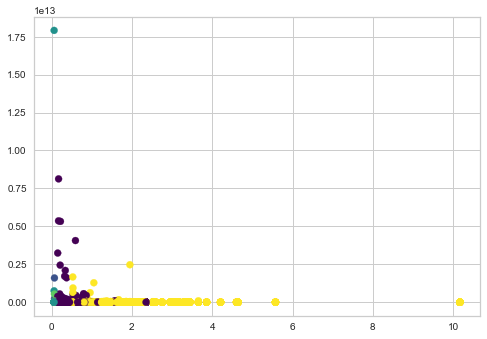

In [315]:
for i in range(1, len(df.columns)):
    plt.scatter(df2.iloc[:,0], df2.iloc[:,i], c = model1_labels, cmap = "viridis");

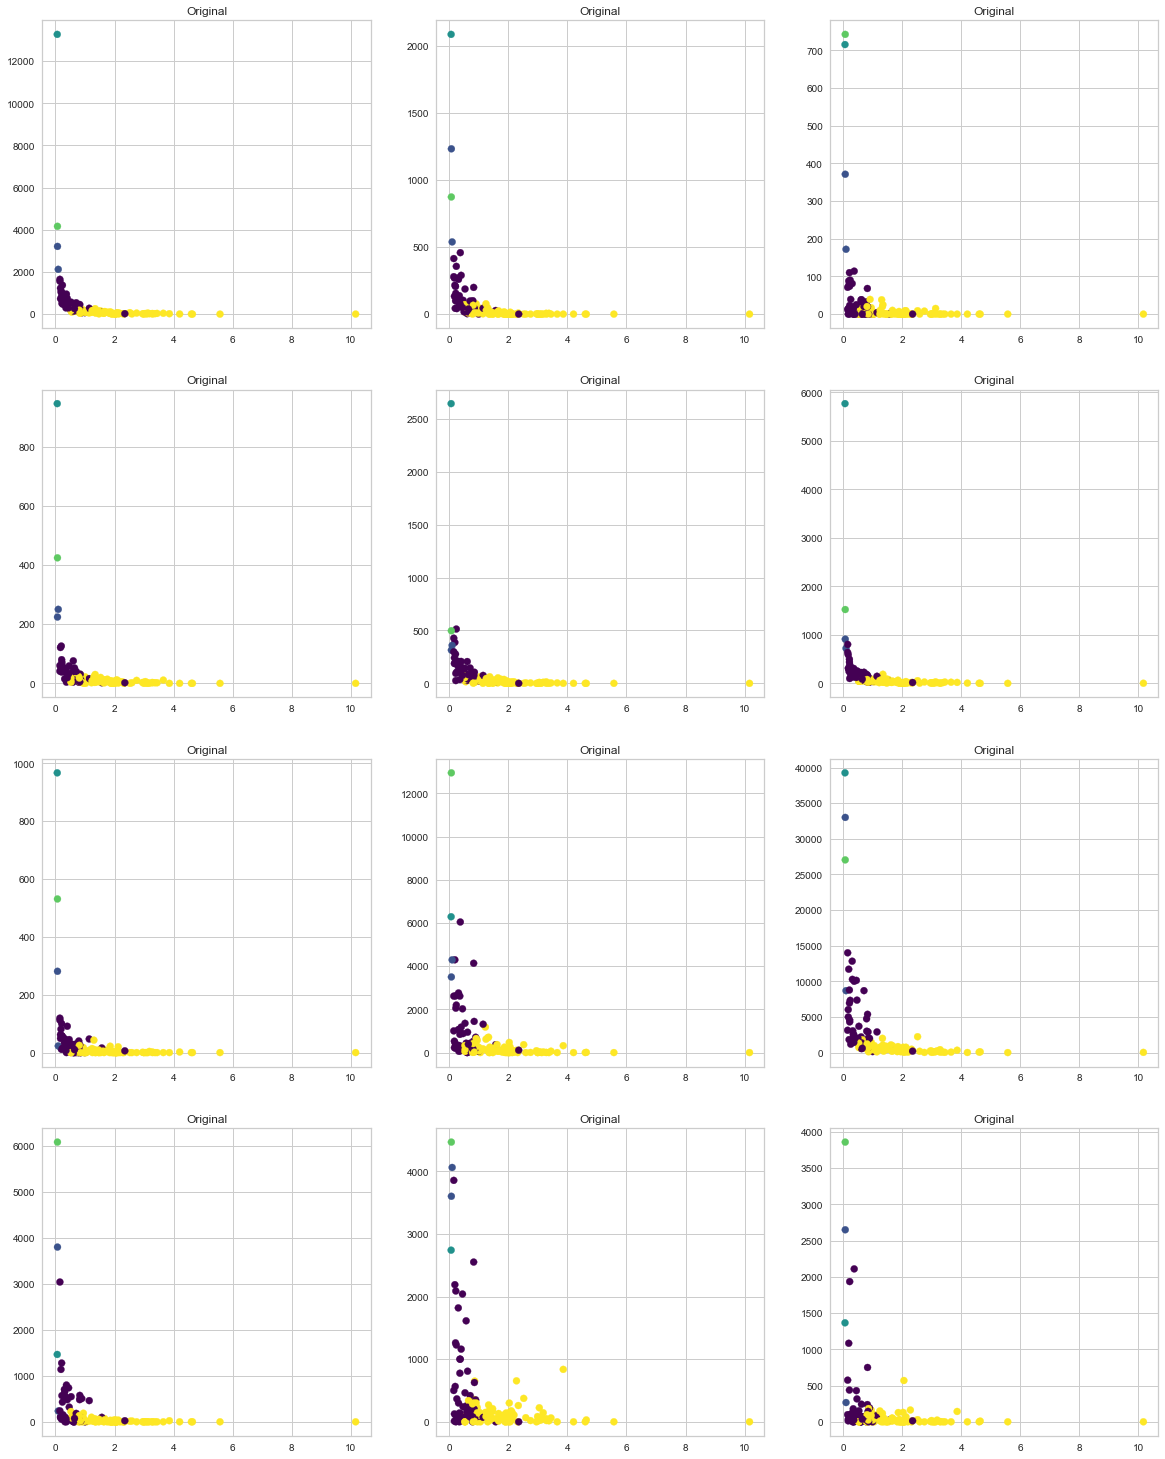

In [316]:
plt.figure(figsize = (20,60))

plt.subplot(9,3,1)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,2)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,2], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,3)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,3], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,4)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,4], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,5)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,5], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,6)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,6], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,7)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,7], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,8)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,8], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,9)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,9], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,10)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,10], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,11)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,11], c = model1_labels, cmap = "viridis");
plt.subplot(9,3,12)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,12], c = model1_labels, cmap = "viridis");

In [317]:
clusters = model1_labels
df2["predicted_clusters_hc"] = clusters

In [318]:
df2.head()

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   
Albania                              2.314                       19   
Algeria                              0.466                      551   
Angola                               0.838                      295   
Argentina                            0.652                      227   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   
Albania                                       0   
Algeria                                     103   
Angola                                       72   
Argentina                                    24   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   
Albania                                   0   
Algeria                                  22   
Angola                                   18   
Argentina                                 7   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   
Albania                                            0   
Algeria                                           59   
Angola                                            30   
Argentina                                          9   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   
Albania                                 0                               19   
Algeria                                87                              257   
Angola                                 47                              126   
Argentina                              64                              100   

             attack_helicopter_fleet_strength_value  tank_strength_value  \
country                                                                    
Afghanistan                                       0                    0   
Albania                                           0                    0   
Algeria                                          45                  880   
Angola                                           15                  379   
Argentina                                         0                  370   

             afv/apc_strength_value  self-propelled_artillery_strength_value  \
country                                                                        
Afghanistan                    1062                                        0   
Albania                         467                                        0   
Algeria                        7361                                      320   
Angola                          595                                       28   
Argentina                       739                                       83   

             towed_artillery_strength_value  rocket_projector_strength_value  \
country                                                                        
Afghanistan                             176                               50   
Albania                                   0                                0   
Algeria                                 240                              316   
Angola                                  357                              115   
Argentina                               172                               26   

             navy_fleet_strengths_value  \
country                                   
Afghanistan                       0.000   
Albania                          38.000   
Algeria                         201.000   
Angola           

In [320]:
df2["predicted_clusters_hc"].value_counts()

4    84
0    50
1     2
2     1
3     1
Name: predicted_clusters_hc, dtype: int64

In [321]:
df2[df2["predicted_clusters_hc"]==0].index

Index(['Algeria', 'Australia', 'Bangladesh', 'Belarus', 'Bolivia', 'Brazil',
       'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Denmark', 'Egypt',
       'Finland', 'France', 'Germany', 'Greece', 'Indonesia', 'Iran', 'Iraq',
       'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait', 'Malaysia', 'Mexico',
       'Morocco', 'Myanmar', 'Netherlands', 'North Korea', 'Pakistan', 'Peru',
       'Poland', 'Portugal', 'Romania', 'Saudi Arabia', 'Singapore',
       'South Africa', 'South Korea', 'South Sudan', 'Spain', 'Syria',
       'Taiwan', 'Thailand', 'Turkey', 'Ukraine', 'United Arab Emirates',
       'United Kingdom', 'Venezuela', 'Vietnam'],
      dtype='object', name='country')

In [322]:
df2[df2["predicted_clusters_hc"]==1].index

Index(['China', 'India'], dtype='object', name='country')

In [323]:
df2[df2["predicted_clusters_hc"]==2].index

Index(['United States'], dtype='object', name='country')

In [324]:
df2[df2["predicted_clusters_hc"]==3].index

Index(['Russia'], dtype='object', name='country')

In [326]:
df2[df2["predicted_clusters_hc"]==4].index

Index(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia', 'Austria',
       'Azerbaijan', 'Bahrain', 'Belgium', 'Bhutan', 'Bosnia and Herzegovina',
       'Botswana', 'Burkina Faso', 'Cambodia', 'Cameroon',
       'Central African Republic', 'Chad', 'Croatia', 'Cuba', 'Czechia',
       'Democratic Republic of the Congo', 'Dominican Republic', 'Ecuador',
       'El Salvador', 'Estonia', 'Ethiopia', 'Gabon', 'Georgia', 'Ghana',
       'Guatemala', 'Honduras', 'Hungary', 'Ireland', 'Ivory Coast',
       'Kazakhstan', 'Kenya', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
       'Liberia', 'Libya', 'Lithuania', 'Madagascar', 'Mali', 'Mauritania',
       'Moldova', 'Mongolia', 'Montenegro', 'Mozambique', 'Namibia', 'Nepal',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia',
       'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Qatar',
       'Republic of the Congo', 'Serbia', 'Sierra Leone', 'Slovakia',
       'Slovenia', 'Somalia', 'Sri Lanka', 'Sudan'

In [328]:
df2["military_power"] = df2["predicted_clusters_hc"].map({  0 : "medium",
                                                    1 : "powerfull2",
                                                    2 : "most_powerful",
                                                    3 : "powerfull1",
                                                    4 : "low",
                                                 })

In [329]:
df2

military_strength_power_index  aircraft_strength_value  \
country                                                               
Afghanistan                          1.344                      260   
Albania                              2.314                       19   
Algeria                              0.466                      551   
Angola                               0.838                      295   
Argentina                            0.652                      227   
...                                    ...                      ...   
Venezuela                            0.645                      260   
Vietnam                              0.356                      293   
Yemen                                1.241                      169   
Zambia                               1.646                      108   
Zimbabwe                             1.758                       90   

             fighter/interceptor_strength_value  \
country                                           
Afghanistan                                   0   
Albania                                       0   
Algeria                                     103   
Angola                                       72   
Argentina                                    24   
...                                         ...   
Venezuela                                    38   
Vietnam                                      77   
Yemen                                        77   
Zambia                                       18   
Zimbabwe                                     10   

             attack_aircraft_strength_value  \
country                                       
Afghanistan                              25   
Albania                                   0   
Algeria                                  22   
Angola                                   18   
Argentina                                 7   
...                                     ...   
Venezuela                                 0   
Vietnam                                   0   
Yemen                                     0   
Zambia                                    0   
Zimbabwe                                  0   

             transport_aircraft_fleet_strength_value  \
country                                                
Afghanistan                                       30   
Albania                                            0   
Algeria                                           59   
Angola                                            30   
Argentina                                          9   
...                                              ...   
Venezuela                                         52   
Vietnam                                           38   
Yemen                                              8   
Zambia                                            11   
Zimbabwe                                          14   

             trainer_aircraft_fleet_value  helicopter_fleet_strength_value  \
country                                                                      
Afghanistan                             0                              187   
Albania                                 0                               19   
Algeria                                87                              257   
Angola                                 47                              126   
Argentina                              64                              100   
...                                   ...                              ...   
Venezuela                              82                               86   
Vietnam                                36                              138   
Yemen                                  21                               61   
Zambia                                 52                               27   
Zimbabwe                               38                               28   

             attack_helicopter_fleet_strength_value  tank_strength_va

In [337]:
df2 = df2.reset_index()

In [341]:
df2.groupby("predicted_clusters_hc")["country"].unique()

predicted_clusters_hc
0    [Algeria, Australia, Bangladesh, Belarus, Bolivia, Brazil, Bulgaria, Canada, Chile, Colombia, Denmark, Egypt, Finland, France, Germany, Greece, Indonesia, Iran, Iraq, Israel, Italy, Japan, Jordan,...
1                                                                                                                                                                                             [China, India]
2                                                                                                                                                                                            [United States]
3                                                                                                                                                                                                   [Russia]
4    [Afghanistan, Albania, Angola, Argentina, Armenia, Austria, Azerbaijan, Bahrain, Belgium, Bhutan, Bosnia and Herzegovina, Botswana, Burkina Faso, Cambodi

In [344]:
df2["military_power"].value_counts()

low              84
medium           50
powerfull2        2
powerfull1        1
most_powerful     1
Name: military_power, dtype: int64

In [343]:
df2.groupby("military_power")["country"].unique()["low"]

array(['Afghanistan', 'Albania', 'Angola', 'Argentina', 'Armenia',
       'Austria', 'Azerbaijan', 'Bahrain', 'Belgium', 'Bhutan',
       'Bosnia and Herzegovina', 'Botswana', 'Burkina Faso', 'Cambodia',
       'Cameroon', 'Central African Republic', 'Chad', 'Croatia', 'Cuba',
       'Czechia', 'Democratic Republic of the Congo',
       'Dominican Republic', 'Ecuador', 'El Salvador', 'Estonia',
       'Ethiopia', 'Gabon', 'Georgia', 'Ghana', 'Guatemala', 'Honduras',
       'Hungary', 'Ireland', 'Ivory Coast', 'Kazakhstan', 'Kenya',
       'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon', 'Liberia', 'Libya',
       'Lithuania', 'Madagascar', 'Mali', 'Mauritania', 'Moldova',
       'Mongolia', 'Montenegro', 'Mozambique', 'Namibia', 'Nepal',
       'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Macedonia',
       'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines', 'Qatar',
       'Republic of the Congo', 'Serbia', 'Sierra Leone', 'Slovakia',
       'Slovenia', 'Somalia', 'Sri Lanka', 

In [345]:
df2.groupby("military_power")["country"].unique()["medium"]

array(['Algeria', 'Australia', 'Bangladesh', 'Belarus', 'Bolivia',
       'Brazil', 'Bulgaria', 'Canada', 'Chile', 'Colombia', 'Denmark',
       'Egypt', 'Finland', 'France', 'Germany', 'Greece', 'Indonesia',
       'Iran', 'Iraq', 'Israel', 'Italy', 'Japan', 'Jordan', 'Kuwait',
       'Malaysia', 'Mexico', 'Morocco', 'Myanmar', 'Netherlands',
       'North Korea', 'Pakistan', 'Peru', 'Poland', 'Portugal', 'Romania',
       'Saudi Arabia', 'Singapore', 'South Africa', 'South Korea',
       'South Sudan', 'Spain', 'Syria', 'Taiwan', 'Thailand', 'Turkey',
       'Ukraine', 'United Arab Emirates', 'United Kingdom', 'Venezuela',
       'Vietnam'], dtype=object)

In [346]:
df2.groupby("military_power")["country"].unique()["powerfull2"]

array(['China', 'India'], dtype=object)

In [347]:
df2.groupby("military_power")["country"].unique()["powerfull1"]

array(['Russia'], dtype=object)

In [349]:
df2.groupby("military_power")["country"].unique()["most_powerful"]

array(['United States'], dtype=object)

In [187]:
class0 = df2.nlargest(138, "military_strength_power_index").iloc[0:111, 0]

In [188]:
class1 = df2.nlargest(138, "military_strength_power_index").iloc[111:135, 0]

In [189]:
class2 = df2.nlargest(138, "military_strength_power_index").iloc[135:137, 0]
class2

26      China
101    Russia
Name: country, dtype: object

In [203]:
class3 = df2.nlargest(138, "military_strength_power_index").iloc[137:138, 0]
class3

130    United States
Name: country, dtype: object

In [200]:
df2["domain_class"] = ""

In [210]:
df2["domain_class"][0:111]=0
df2["domain_class"][111:135]=1
df2["domain_class"][135:137]=2
df2["domain_class"][137:138]=3

In [211]:
df2["domain_class"].value_counts(dropna=False)

0    111
1     24
2      2
3      1
Name: domain_class, dtype: int64

In [214]:
df2[["domain_class","predicted_clusters_hc"]]

domain_class  predicted_clusters_hc
0              0                      0
1              0                      0
2              0                      0
3              0                      0
4              0                      0
..           ...                    ...
133            1                      0
134            1                      0
135            2                      0
136            2                      0
137            3                      0

[138 rows x 2 columns]

In [215]:
ct = pd.crosstab(df2["domain_class"],df2["predicted_clusters_hc"])
ct

predicted_clusters_hc    0  1  2  3
domain_class                       
0                      108  2  0  1
1                       23  0  1  0
2                        2  0  0  0
3                        1  0  0  0

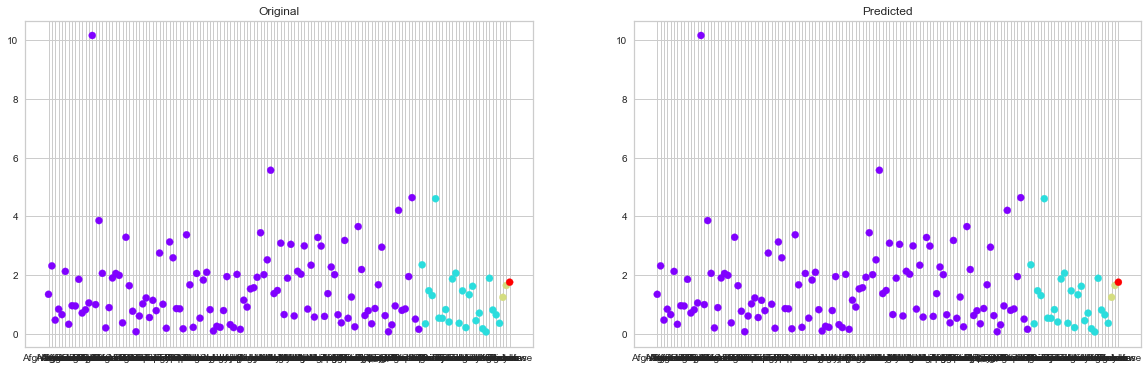

In [216]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = df2.domain_class, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(df2.iloc[:,0], df2.iloc[:,1], c = df2.domain_class, s = 50, cmap = "rainbow");

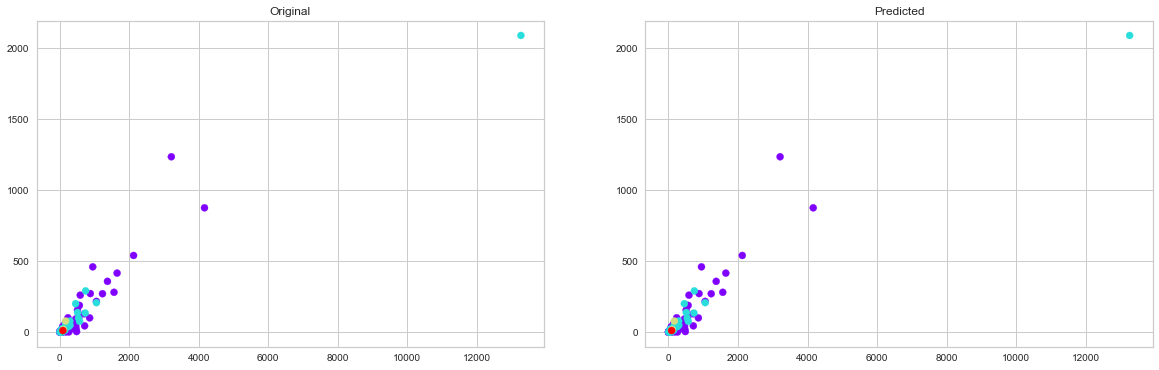

In [217]:
plt.figure(figsize = (20,6))

plt.subplot(121)
plt.title("Original")
plt.scatter(df2.iloc[:,2], df2.iloc[:,3], c = df2.domain_class, s = 50, cmap = "rainbow")

plt.subplot(122)
plt.title("Predicted")
plt.scatter(df2.iloc[:,2], df2.iloc[:,3], c = df2.domain_class, s = 50, cmap = "rainbow");

In [219]:
from sklearn.metrics.cluster import adjusted_rand_score
adjusted_rand_score(df2['domain_class'], df2['predicted_clusters'])

0.07539730606299609

### Model Building and label visualisation

### Evaluate 